In [2]:
import pandas as pd
import numpy as np

file_path = 'D:/Hangze Wu/BSE/DSDM/semester3/Master Thesis/thesis project/data/Account Products.xlsx'
web_traffic_df = pd.read_excel(file_path, sheet_name='web_traffic_accounts')

"evobanco.com/cuenta-inteligente  modified URL"

In [2]:
web_traffic_df.rename(columns={"evobanco.com/cuenta-inteligente":"evobanco.com/cuenta-inteligente/"}, inplace=True)

web_traffic_df.head(5)

,Date,abanca.com/es/cuentas/cuenta-online,n26.com/es-es/cuenta-sin-comisiones,bancsabadell.com/cuenta-online,ing.es/cuenta-nocuenta-ing,bbva.es/personas/productos/cuentas/cuenta-online-sin-comisiones.html,revolut.com/es-ES/a-radically-better-account/,openbank.es/cuenta-ahorro-bienvenida,myinvestor.es/cuentas-tarjetas/cuentas,n26.com/es-es/cuenta-ahorro,bankinter.com/banca/cuentas-tarjetas/cuentas/cuenta-nomina,ing.es/cuenta-nocuenta-ing.1,evobanco.com/cuenta-inteligente/,bancosantander.es/particulares/cuentas-tarjetas/cuentas-corrientes/cuenta-online-sin-comisiones
0,2021-12-01,15202.983835,6664.368911,NaN,NaN,45449.486787,1343.418328,NaN,5319.608623,NaN,8733.560835,NaN,5055.542564,22325.885971
1,2022-01-01,42183.913207,5310.177360,NaN,NaN,38306.464983,1531.016801,NaN,6577.851993,NaN,11410.593443,NaN,4539.012047,28331.245044
2,2022-02-01,34498.153115,5547.588971,NaN,NaN,40978.325821,1304.591257,NaN,4031.716960,NaN,8891.661053,NaN,6049.457905,23798.819170
3,2022-03-01,34546.319021,4900.271300,NaN,NaN,43970.545627,1105.180575,NaN,4941.009311,NaN,7446.925144,NaN,9826.193608,24808.561729
4,2022-04-01,40508.288420,4909.581023,NaN,NaN,40782.451956,1020.968713,NaN,5774.734455,NaN,10285.861726,NaN,5028.236254,24739.758729


In [3]:
web_traffic_df = web_traffic_df.reset_index(drop=True)
# Melting the DataFrame
long_web_traffic_df = web_traffic_df.melt(id_vars=['Date'], var_name='URL', value_name='Web Traffic')


# Ensure no 'index' labels incorrectly positioned
print(long_web_traffic_df.head(5))

        Date                                  URL   Web Traffic
0 2021-12-01  abanca.com/es/cuentas/cuenta-online  15202.983835
1 2022-01-01  abanca.com/es/cuentas/cuenta-online  42183.913207
2 2022-02-01  abanca.com/es/cuentas/cuenta-online  34498.153115
3 2022-03-01  abanca.com/es/cuentas/cuenta-online  34546.319021
4 2022-04-01  abanca.com/es/cuentas/cuenta-online  40508.288420


In [4]:
file_path = 'D:/Hangze Wu/BSE/DSDM/semester3/Master Thesis/thesis project/data/Account Products.xlsx'
bank_df = pd.read_excel(file_path, sheet_name='account_products')

bank_df.drop(columns=['Unnamed: 0'], inplace=True)
bank_df.head(5)

,account product,bank,url - bank product information
0,Cuenta N26,N26,n26.com/es-es/cuenta-sin-comisiones
1,Cuenta Online Sabadell,Banc Sabadell,bancsabadell.com/cuenta-online
2,Cuenta Clara Abanca,ABANCA,abanca.com/es/cuentas/cuenta-online
3,Cuenta Inteligente Bienvenida Evo,EVO Banco,evobanco.com/cuenta-inteligente/
4,Cuenta No Cuenta,ING,ing.es/cuenta-nocuenta-ing


In [5]:
long_web_traffic_df['Date'] = pd.to_datetime(long_web_traffic_df['Date'])
bank_df.rename(columns={'url - bank product information':'URL'},inplace=True)

long_web_traffic_df['URL'] = long_web_traffic_df['URL'].str.strip()
bank_df['URL'] = bank_df['URL'].str.strip()

web_traffic_merged_df = pd.merge(
    bank_df, 
    long_web_traffic_df, 
    how='left', 
    on=['URL']
)

display(web_traffic_merged_df.head(5)), web_traffic_merged_df['account product'].value_counts()

,account product,bank,URL,Date,Web Traffic
0,Cuenta N26,N26,n26.com/es-es/cuenta-sin-comisiones,2021-12-01,6664.368911
1,Cuenta N26,N26,n26.com/es-es/cuenta-sin-comisiones,2022-01-01,5310.177360
2,Cuenta N26,N26,n26.com/es-es/cuenta-sin-comisiones,2022-02-01,5547.588971
3,Cuenta N26,N26,n26.com/es-es/cuenta-sin-comisiones,2022-03-01,4900.271300
4,Cuenta N26,N26,n26.com/es-es/cuenta-sin-comisiones,2022-04-01,4909.581023


(None,
 account product
 Cuenta N26                           25
 Cuenta Online Sabadell               25
 Cuenta Clara Abanca                  25
 Cuenta Inteligente Bienvenida Evo    25
 Cuenta No Cuenta                     25
 Cuenta Online Sin Comisiones         25
 Cuenta Revolut                       25
 Cuenta Online Nómina Santander       25
 Cuenta Nómina                        25
 Cuenta Nómina hasta 5% TAE           25
 Cuenta de Ahorro N26                 25
 Cuenta 2,5% MyInvestor               25
 Cuenta de Ahorro Bienvenida          25
 Name: count, dtype: int64)

In [6]:
web_traffic_merged_df['bank'].value_counts()

bank
N26                50
ING                50
Banc Sabadell      25
ABANCA             25
EVO Banco          25
BBVA               25
Revolut            25
Banco Santander    25
Bankinter          25
MyInvestor         25
Openbank           25
Name: count, dtype: int64

In [235]:
file_path = 'D:/Hangze Wu/BSE/DSDM/semester3/Master Thesis/thesis project/MS/Account Products.xlsx'
df = pd.read_excel(file_path, sheet_name='google_trends')

display(df.head(5))

,Date,Abanca,Santander,Sabadell,BBVA,Bankinter,CaixaBank,EVO Banco,N26,Openbank
0,2021-12-05,6,58,28,41,11,7,2,1,4
1,2021-12-12,8,71,38,49,13,7,3,1,4
2,2021-12-19,8,65,33,47,12,6,3,1,4
3,2021-12-26,9,68,36,47,12,6,3,1,5
4,2022-01-02,8,61,31,46,11,6,3,1,5


In [8]:
google_df = df.copy()
google_df['Date'] = pd.to_datetime(google_df['Date'])

# Set 'Date' as index
google_df.set_index('Date', inplace=True)

google_df.sort_index(inplace=True)

# Filter for dates before 2022-01-01
filtered_df = google_df.loc['2021-1-01':]

google_df = filtered_df

# Resample to monthly frequency and aggregate data
monthly_google_df = google_df.resample('M').sum()  # Use sum, mean, or other aggregation function

# Reset index to have 'Month' as a column
monthly_google_df.reset_index(inplace=True)

monthly_google_df= monthly_google_df.reset_index(drop=True)
# Melting the DataFrame
long_monthly_google_df = monthly_google_df.melt(id_vars=['Date'], var_name='bank name', value_name='google trend')

long_monthly_google_df['Date'] = pd.to_datetime(long_monthly_google_df['Date'])
#long_monthly_google_df.set_index('Date', inplace=True)

long_monthly_google_df.head(3)

C:\Users\wuhangze\AppData\Local\Temp\ipykernel_10796\3576505576.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_google_df = google_df.resample('M').sum()  # Use sum, mean, or other aggregation function


,Date,bank name,google trend
0,2021-12-31,Abanca,31
1,2022-01-31,Abanca,39
2,2022-02-28,Abanca,29


In [9]:
long_monthly_google_df['bank name'].value_counts()

bank name
Abanca       25
Santander    25
Sabadell     25
BBVA         25
Bankinter    25
CaixaBank    25
EVO Banco    25
N26          25
Openbank     25
Name: count, dtype: int64

## Merge the banks, Web tarffic with Google Trend

In [10]:
web_traffic_merged_df.rename(columns={"bank":"bank_name"},inplace = True)
long_monthly_google_df.rename(columns={"bank name":"bank_name"},inplace=True)

In [11]:
# Convert the 'Date' columns to datetime format
web_traffic_merged_df['Date'] = pd.to_datetime(web_traffic_merged_df['Date'])

# Format the 'Date' columns to "YYYY-MM"
long_monthly_google_df['Date'] = long_monthly_google_df['Date'].dt.to_period('M').dt.to_timestamp()
web_traffic_merged_df['Date'] = web_traffic_merged_df['Date'].dt.to_period('M').dt.to_timestamp()

print("Google Trends DataFrame:")
print(long_monthly_google_df.head(5))
print("\nWeb Traffic DataFrame:")
print(web_traffic_merged_df.head(5))

Google Trends DataFrame:
        Date bank_name  google trend
0 2021-12-01    Abanca            31
1 2022-01-01    Abanca            39
2 2022-02-01    Abanca            29
3 2022-03-01    Abanca            27
4 2022-04-01    Abanca            27

Web Traffic DataFrame:
  account product bank_name                                  URL       Date  \
0      Cuenta N26       N26  n26.com/es-es/cuenta-sin-comisiones 2021-12-01   
1      Cuenta N26       N26  n26.com/es-es/cuenta-sin-comisiones 2022-01-01   
2      Cuenta N26       N26  n26.com/es-es/cuenta-sin-comisiones 2022-02-01   
3      Cuenta N26       N26  n26.com/es-es/cuenta-sin-comisiones 2022-03-01   
4      Cuenta N26       N26  n26.com/es-es/cuenta-sin-comisiones 2022-04-01   

   Web Traffic  
0  6664.368911  
1  5310.177360  
2  5547.588971  
3  4900.271300  
4  4909.581023  


In [12]:
bank_name_mapping = {
    'N26': 'N26',
    'ING': 'ING',
    'Banc Sabadell': 'Sabadell',
    'ABANCA': 'Abanca',
    'EVO Banco': 'EVO Banco',
    'BBVA': 'BBVA',
    'Revolut': 'Revolut', # This one doesn't have a match in the provided Google Trends data, might need to check
    'Banco Santander': 'Santander',
    'Bankinter': 'Bankinter',
    'MyInvestor': None, # This one doesn't have a match in the provided Google Trends data
    'Openbank': 'Openbank'
}

In [13]:
# Apply the mapping dictionary to the long_monthly_google_df
long_monthly_google_df['bank_name'] = long_monthly_google_df['bank_name'].map(bank_name_mapping)
# Filter out rows with None values after mapping
long_monthly_google_df = long_monthly_google_df.dropna(subset=['bank_name'])

# Merge the DataFrames on 'bank_name' and 'Date'
merged_df = pd.merge(web_traffic_merged_df, long_monthly_google_df, on=['bank_name', 'Date'])

# Set index for panel data
#merged_df.set_index(['account product', 'Date'], inplace=True)
# Optional: Sort the DataFrame by the index
#merged_df.sort_index(inplace=True)

print("\nMerged DataFrame:")
print(merged_df[[ 'Web Traffic', 'google trend']])


Merged DataFrame:
      Web Traffic  google trend
0     6664.368911             4
1     5310.177360             5
2     5547.588971             4
3     4900.271300             4
4     4909.581023             4
..            ...           ...
145  11585.968429            16
146   8604.217515            18
147  11373.377132            22
148  10553.927787            14
149  24651.811838            21

[150 rows x 2 columns]


#### As some bank product dont have web traffic until it's website was built. so we only work the product that contain web traffic

In [14]:
# Determine the earliest date in the DataFrame
start_date = merged_df['Date'].min()

# Identify bank products that have data from the start date
valid_products = merged_df[merged_df['Date'] == start_date]['account product'].unique()

# Filter out bank products that do not have data from the start date
filtered_df = merged_df[merged_df['account product'].isin(valid_products)]

# Set index for panel data
filtered_df.set_index(['account product', 'Date'], inplace=True)

# Sort the DataFrame by the index
filtered_df.sort_index(inplace=True)

print("Filtered DataFrame:")
print(filtered_df[['google trend', 'Web Traffic']])

Filtered DataFrame:
                                              google trend   Web Traffic
account product                   Date                                  
Cuenta Inteligente Bienvenida Evo 2021-12-01            11   5055.542564
                                  2022-01-01            14   4539.012047
                                  2022-02-01            12   6049.457905
                                  2022-03-01            12   9826.193608
                                  2022-04-01            11   5028.236254
...                                                    ...           ...
Cuenta de Ahorro N26              2023-08-01             7   9104.383956
                                  2023-09-01             7   7935.475920
                                  2023-10-01             7   8796.029984
                                  2023-11-01             5   9529.609109
                                  2023-12-01             7  12034.247890

[150 rows x 2 columns]


In [266]:
import numpy as np
import warnings

warnings.filterwarnings("ignore")

# Load the regression_clean_data.csv file
regression_clean_data_path = f"D:\Hangze Wu\BSE\DSDM\semester3\Master Thesis\github_thesis\deloitte_digital_banking\deloitte_digital_banking\data\\regression_clean_data.csv"
regression_clean_data = pd.read_csv(regression_clean_data_path)

regression_clean_data['Log_Web_Traffic'] = np.log1p(regression_clean_data['web_traffic'])
regression_clean_data['Log_incentive'] = np.log1p(regression_clean_data['incentive'])

regression_clean_data['date'] = pd.to_datetime(regression_clean_data['date'])

# Set index for panel data
regression_clean_data.set_index(['bank', 'date'], inplace=True)

# Sort the DataFrame by the index
regression_clean_data.sort_index(inplace=True)

regression_clean_data.head(3)

<>:7: SyntaxWarning: invalid escape sequence '\H'
<>:7: SyntaxWarning: invalid escape sequence '\H'
C:\Users\wuhangze\AppData\Local\Temp\ipykernel_43664\3262264993.py:7: SyntaxWarning: invalid escape sequence '\H'
  regression_clean_data_path = f"D:\Hangze Wu\BSE\DSDM\semester3\Master Thesis\github_thesis\deloitte_digital_banking\deloitte_digital_banking\data\\regression_clean_data.csv"


web_traffic  cross_visitation  search_interest  rank  \
bank   date                                                                
abanca 2021-12-01  15202.983835          0.077994             7.75   4.0   
       2022-01-01  42183.913207          0.062500             7.80   4.0   
       2022-02-01  34498.153115          0.052288             7.25   4.0   

                   incentive  apr  mentions  Log_Web_Traffic  Log_incentive  
bank   date                                                                  
abanca 2021-12-01      150.0  0.0       1.0         9.629313        5.01728  
       2022-01-01      150.0  0.0       1.0        10.649818        5.01728  
       2022-02-01      150.0  0.0       2.0        10.448690        5.01728

In [243]:
filtered_df = regression_clean_data

In [237]:
# Check how many unique account products
unique_account_products = filtered_df.index.get_level_values('bank').nunique()
print(f"Number of unique account products: {unique_account_products}")

Number of unique account products: 11


### Fixed Effect: Web traffic = AR(1) + 12 months Dummies + Google trend

#### previous 2 Lag

In [251]:

# Concatenate the dummy variables with the original DataFrame
filtered_df = pd.concat([filtered_df, monthly_dummies], axis=1)
filtered_df 

web_traffic  cross_visitation  search_interest  \
bank      date                                                          
abanca    2022-01-01  42183.913207          0.062500             7.80   
          2022-02-01  34498.153115          0.052288             7.25   
          2022-03-01  34546.319021          0.061503             6.75   
          2022-04-01  40508.288420          0.050222             6.75   
          2022-05-01  29791.338180          0.058296             7.40   
...                            ...               ...              ...   
santander 2023-08-01  34290.160425          0.118914            50.50   
          2023-09-01  40388.737821          0.125496            56.25   
          2023-10-01  36636.706633          0.126347            58.60   
          2023-11-01  35387.630139          0.121212            59.75   
          2023-12-01  29101.697517          0.159196            62.80   

                          rank  incentive  apr  mentions  Log_Web_Traffic  \
bank      date                                                              
abanca    2022-01-01  4.000000      150.0  0.0       1.0        10.649818   
          2022-02-01  4.000000      150.0  0.0       2.0        10.448690   
          2022-03-01  4.000000      150.0  0.0       2.0        10.450085   
          2022-04-01  4.000000      300.0  0.0       2.0        10.609287   
          2022-05-01  3.500000      300.0  0.0       2.0        10.302007   
...                        ...        ...  ...       ...              ...   
santander 2023-08-01  3.500000      150.0  0.0       1.0        10.442643   
          2023-09-01  3.500000      400.0  0.0       3.0        10.606331   
          2023-10-01  3.500000      400.0  0.0       4.0        10.508833   
          2023-11-01  1.500000      400.0  0.0       3.0        10.474146   
          2023-12-01  1.806452      400.0  0.0       2.0        10.278586   

                      Log_incentive  Log_Web_Traffic_Lag1  ...  Month_3  \
bank      date                                             ...            
abanca    2022-01-01       5.017280              9.629313  ...    False   
          2022-02-01       5.017280             10.649818  ...    False   
          2022-03-01       5.017280             10.448690  ...     True   
          2022-04-01       5.707110             10.450085  ...    False   
          2022-05-01       5.707110             10.609287  ...    False   
...                             ...                   ...  ...      ...   
santander 2023-08-01       5.017280             10.716560  ...    False   
          2023-09-01       5.993961             10.442643  ...    False   
          2023-10-01       5.993961             10.606331  ...    False   
          2023-11-01       5.993961             10.508833  ...    False   
          2023-12-01       5.993961             10.474146  ...    False   

                      Month_4  Month_5  Month_6  Month_7  Month_8  Month_9  \
bank      date                                                               
abanca    2022-01-01    False    False    False    False    False    False   
          2022-02-01    False    False    False    False    False    False   
          2022-03-01    False    False    False    False    False    False   
          2022-04-01     True    False    False    False    False    False   
          2022-05-01    False     True    False    False    False    False   
...                       ...      ...      ...      ...      ...      ...   
santander 2023-08-01    False    False    False    False     True    False   
          2023-09-01    False    False    False    False    False     True   
          2023-10-01    False    False    False    False    False    False   
          2023-11-01    False    False    False    False    False    False   
          2023-12-01    False    False    False    False    False    False   

                      Month_10  Month_11  Month_12  
bank      date             

In [238]:
import pandas as pd

# Ensure the DataFrame is sorted by 'bank' and 'date'
filtered_df = filtered_df.sort_index()

# Create lagged variables for past 1, 2, 3, and 4 months of web traffic
filtered_df['Log_Web_Traffic_Lag1'] = filtered_df.groupby(level='bank')['Log_Web_Traffic'].shift(1)
#filtered_df['Log_Web_Traffic_Lag2'] = filtered_df.groupby(level='bank')['Log_Web_Traffic'].shift(2)
#filtered_df['Log_Web_Traffic_Lag3'] = filtered_df.groupby(level='bank')['Log_Web_Traffic'].shift(3)
#filtered_df['Log_Web_Traffic_Lag4'] = filtered_df.groupby(level='bank')['Log_Web_Traffic'].shift(4)

# Drop rows with NaN values resulting from the lag operation
filtered_df = filtered_df.dropna()

# Check for duplicates
duplicates = filtered_df[filtered_df.index.duplicated()]

print("DataFrame with lagged variables:")
display(filtered_df.head(3))

if not duplicates.empty:
    print("Duplicate entries found:")
    print(duplicates)
else:
    print("No duplicate entries found.")


DataFrame with lagged variables:


web_traffic  cross_visitation  search_interest      rank  \
bank   date                                                                    
abanca 2023-07-01  77975.997321         -0.855947        -0.585019  0.028622   
       2023-08-01  90688.236048         -0.928071        -0.630187  0.096065   
       2023-09-01  69082.388420         -1.054426        -0.617640  0.096065   

                   incentive       apr  mentions  Log_Web_Traffic  \
bank   date                                                         
abanca 2023-07-01   1.323383  0.134074 -0.549484        11.264169   
       2023-08-01   1.323383  0.134074 -0.549484        11.415194   
       2023-09-01   1.323383  0.134074 -0.972586        11.143070   

                   Log_incentive  Log_Web_Traffic_Lag1  ...  Month_4  Month_5  \
bank   date                                             ...                     
abanca 2023-07-01        5.70711             11.076427  ...    False    False   
       2023-08-01        5.70711             11.264169  ...    False    False   
       2023-09-01        5.70711             11.415194  ...    False    False   

                   Month_6  Month_7  Month_8  Month_9  Month_10  Month_11  \
bank   date                                                                 
abanca 2023-07-01    False     True    False        0     False     False   
       2023-08-01    False    False     True        0     False     False   
       2023-09-01    False    False    False        1     False     False   

                   Month_12  BoxCox_Web_Traffic  
bank   date                                      
abanca 2023-07-01     False           30.167428  
       2023-08-01     False           30.753688  
       2023-09-01     False           29.700139  

[3 rows x 26 columns]

No duplicate entries found.


#### 12 Month Dummies

In [239]:
# Extract month from the Date index and create dummy variables
filtered_df['Month'] = filtered_df.index.get_level_values('date').month
monthly_dummies = pd.get_dummies(filtered_df['Month'], prefix='Month', drop_first=True)

# Concatenate the dummy variables with the original DataFrame
filtered_df = pd.concat([filtered_df, monthly_dummies], axis=1)

print("DataFrame with monthly dummy variables:")
display(filtered_df.head(3))


DataFrame with monthly dummy variables:


web_traffic  cross_visitation  search_interest      rank  \
bank   date                                                                    
abanca 2023-07-01  77975.997321         -0.855947        -0.585019  0.028622   
       2023-08-01  90688.236048         -0.928071        -0.630187  0.096065   
       2023-09-01  69082.388420         -1.054426        -0.617640  0.096065   

                   incentive       apr  mentions  Log_Web_Traffic  \
bank   date                                                         
abanca 2023-07-01   1.323383  0.134074 -0.549484        11.264169   
       2023-08-01   1.323383  0.134074 -0.549484        11.415194   
       2023-09-01   1.323383  0.134074 -0.972586        11.143070   

                   Log_incentive  Log_Web_Traffic_Lag1  ...  Month_9  \
bank   date                                             ...            
abanca 2023-07-01        5.70711             11.076427  ...        0   
       2023-08-01        5.70711             11.264169  ...        0   
       2023-09-01        5.70711             11.415194  ...        1   

                   Month_10  Month_11  Month_12  BoxCox_Web_Traffic  Month_8  \
bank   date                                                                    
abanca 2023-07-01     False     False     False           30.167428    False   
       2023-08-01     False     False     False           30.753688     True   
       2023-09-01     False     False     False           29.700139    False   

                   Month_9  Month_10  Month_11  Month_12  
bank   date                                               
abanca 2023-07-01    False     False     False     False  
       2023-08-01    False     False     False     False  
       2023-09-01     True     False     False     False  

[3 rows x 31 columns]

### ACF PACF , QQ plot

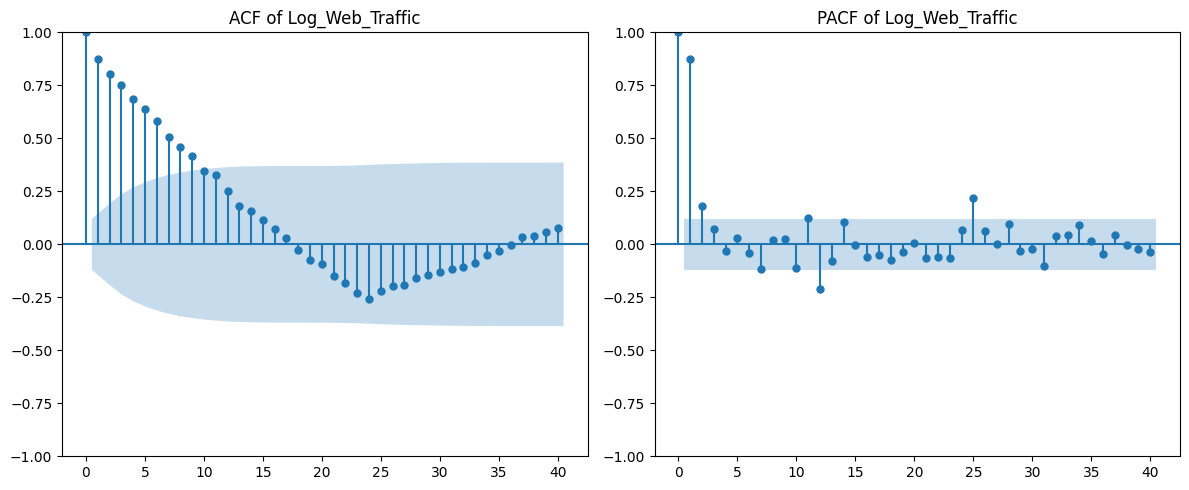

<Figure size 600x600 with 0 Axes>

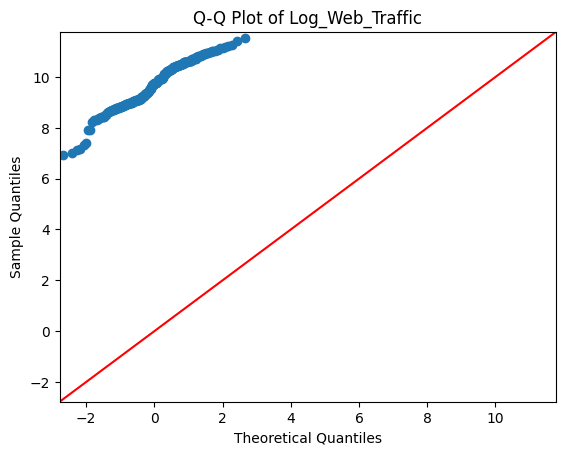

In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Ensure all independent variables are numeric
numeric_columns = ['Log_Web_Traffic_Lag1']
filtered_df[numeric_columns] = filtered_df[numeric_columns].apply(pd.to_numeric, errors='coerce')


# Plotting ACF and PACF for Log_Web_Traffic
plt.figure(figsize=(12, 5))

# ACF plot
plt.subplot(1, 2, 1)
plot_acf(filtered_df['Log_Web_Traffic'], lags=40, ax=plt.gca())
plt.title('ACF of Log_Web_Traffic')

# PACF plot
plt.subplot(1, 2, 2)
plot_pacf(filtered_df['Log_Web_Traffic'], lags=40, ax=plt.gca(), method='ywm')
plt.title('PACF of Log_Web_Traffic')

plt.tight_layout()
plt.show()

# Q-Q plot
plt.figure(figsize=(6, 6))
sm.qqplot(filtered_df['Log_Web_Traffic'], line ='45')
plt.title('Q-Q Plot of Log_Web_Traffic')
plt.show()


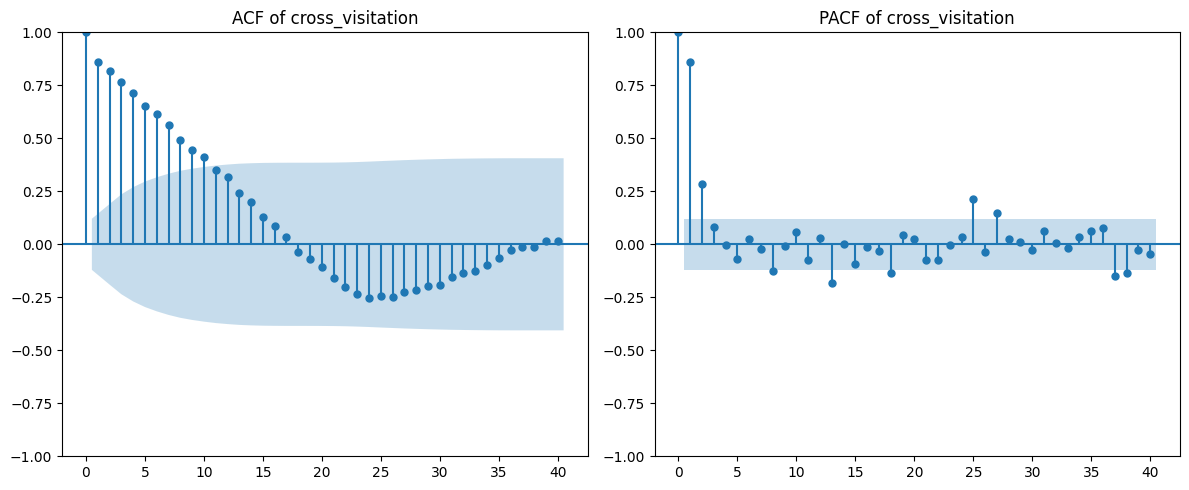

<Figure size 600x600 with 0 Axes>

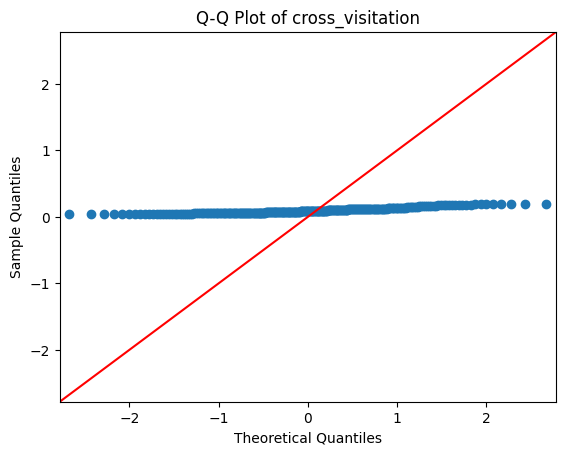

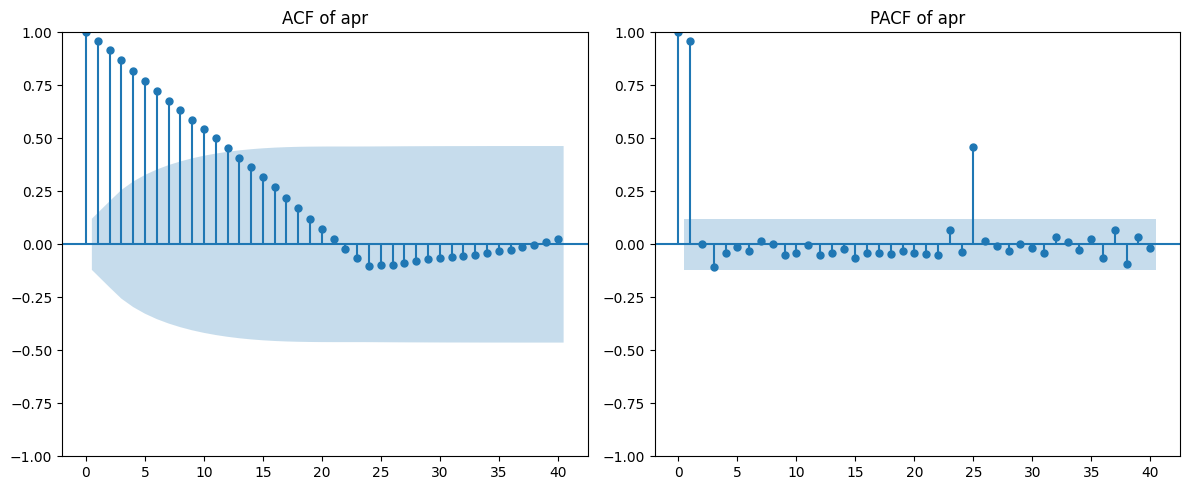

<Figure size 600x600 with 0 Axes>

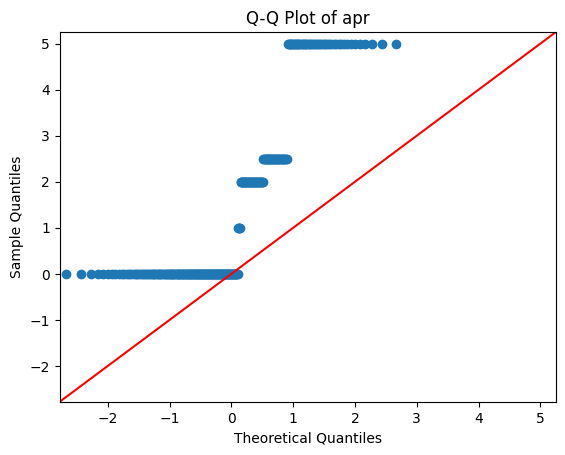

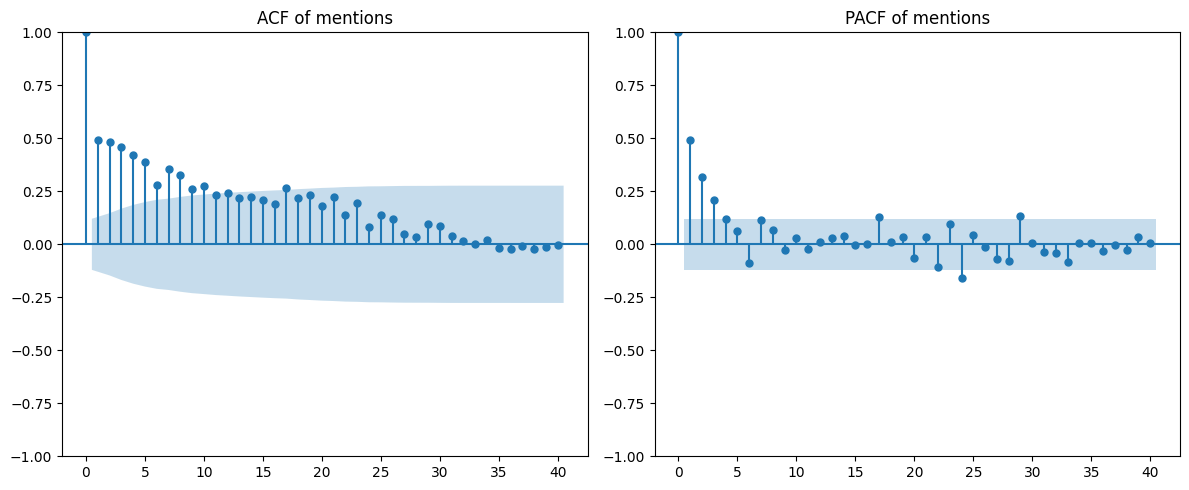

<Figure size 600x600 with 0 Axes>

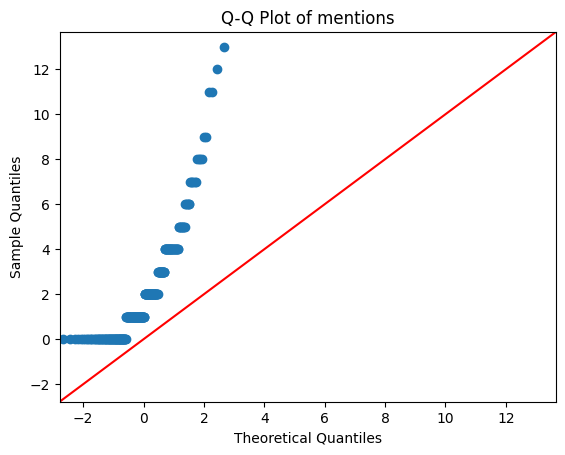

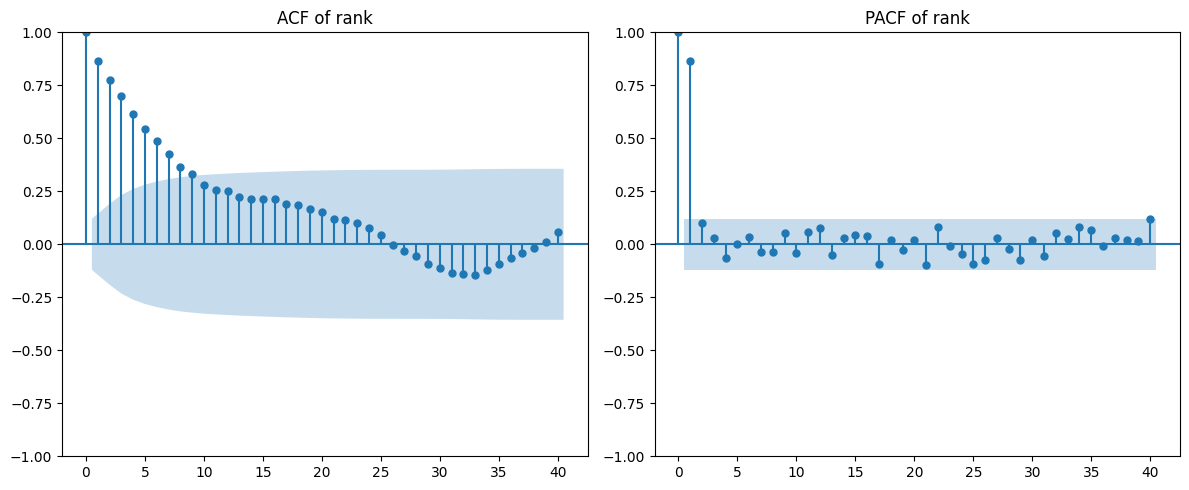

<Figure size 600x600 with 0 Axes>

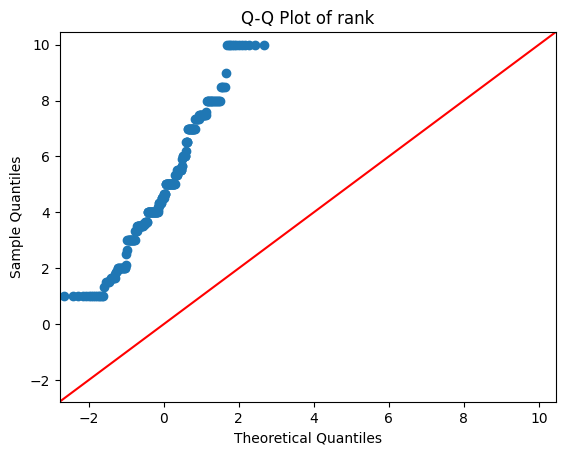

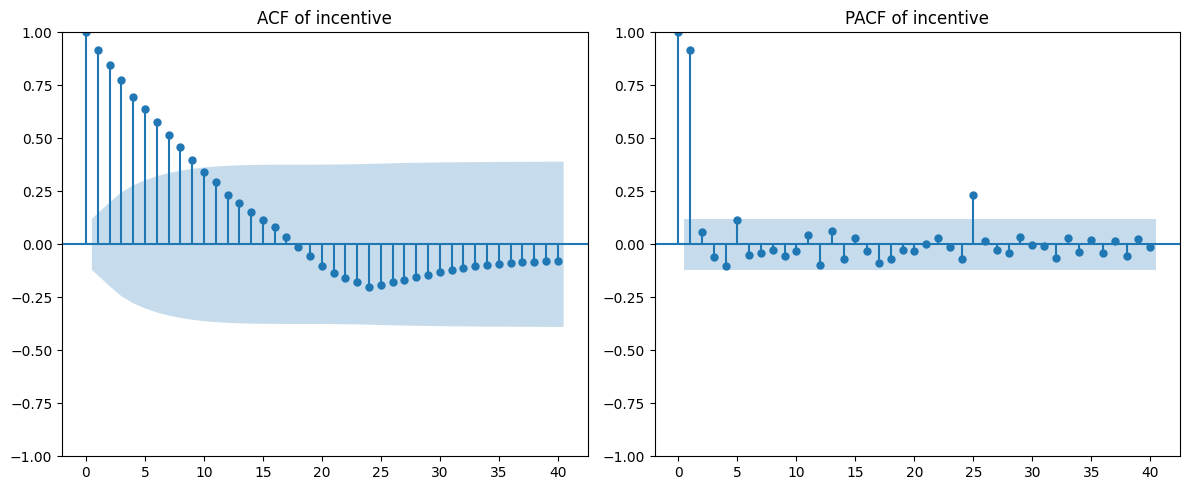

<Figure size 600x600 with 0 Axes>

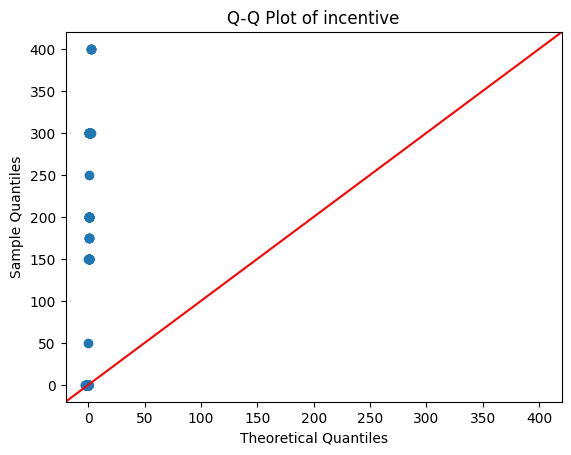

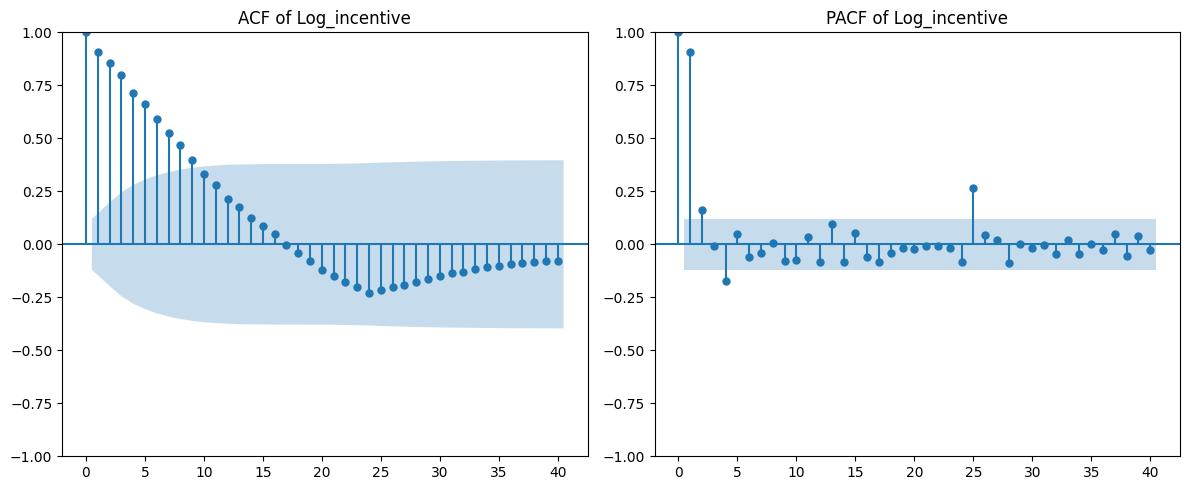

<Figure size 600x600 with 0 Axes>

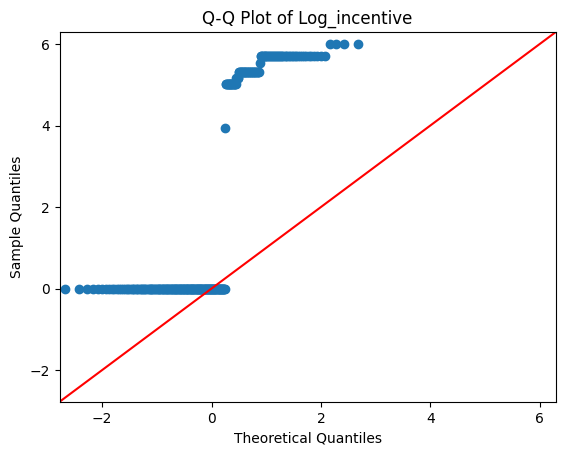

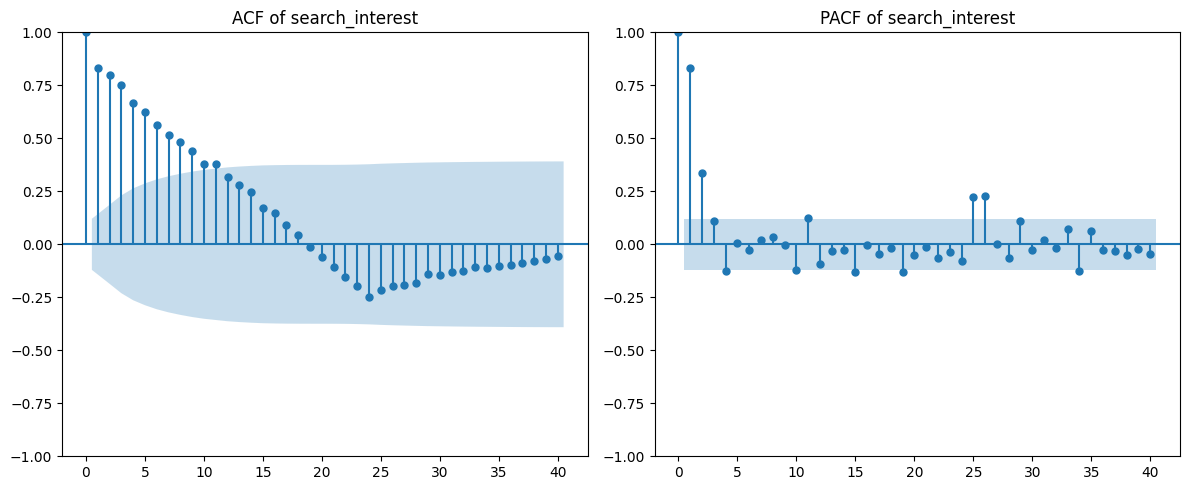

<Figure size 600x600 with 0 Axes>

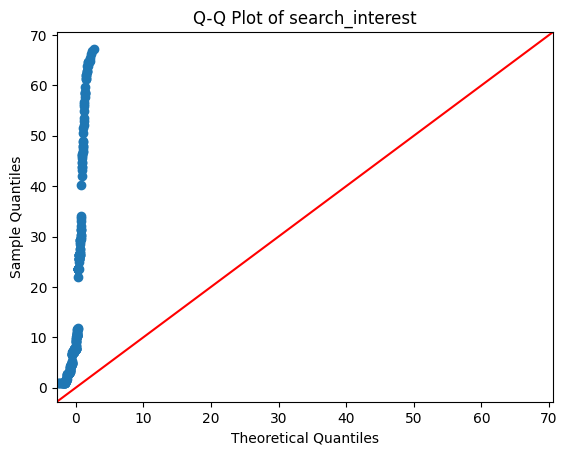

In [287]:
ind_vars = ['cross_visitation', 'apr',
       'mentions', 'rank', 'incentive','Log_incentive', 'search_interest']

for ind in ind_vars:
    # Plotting ACF and PACF for Log_Web_Traffic
    plt.figure(figsize=(12, 5))

    # ACF plot
    plt.subplot(1, 2, 1)
    plot_acf(filtered_df[ind], lags=40, ax=plt.gca())
    plt.title(f'ACF of {ind}')

    # PACF plot
    plt.subplot(1, 2, 2)
    plot_pacf(filtered_df[ind], lags=40, ax=plt.gca(), method='ywm')
    plt.title(f'PACF of {ind}')

    plt.tight_layout()
    plt.show()

    # Q-Q plot
    plt.figure(figsize=(6, 6))
    sm.qqplot(filtered_df[ind], line ='45')
    plt.title(f'Q-Q Plot of {ind}')
    plt.show()



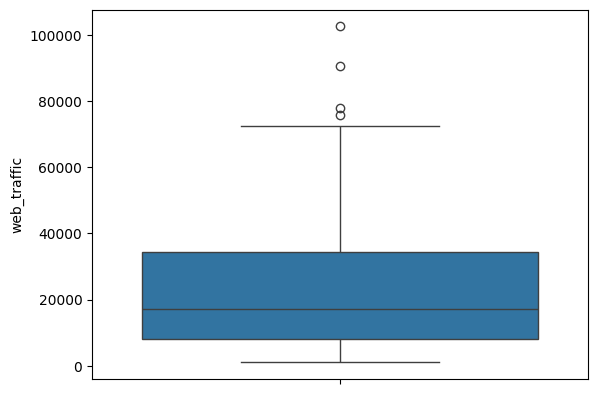

In [282]:
from scipy.stats import boxcox
import numpy as np

# Apply Box-Cox transformation
filtered_df['BoxCox_Web_Traffic'], _ = boxcox(filtered_df['web_traffic'] + 1)  # Adding 1 to avoid log(0)

### Check for Outlier
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize outliers
sns.boxplot(filtered_df['web_traffic'])
plt.show()



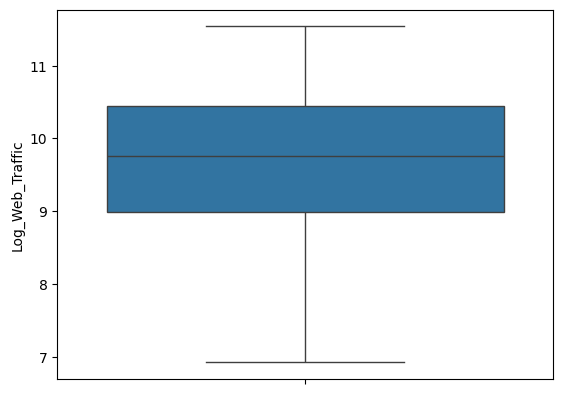

In [283]:
from scipy.stats import boxcox
import numpy as np

# Apply Box-Cox transformation
filtered_df['BoxCox_Web_Traffic'], _ = boxcox(filtered_df['Log_Web_Traffic'] + 1)  # Adding 1 to avoid log(0)

### Check for Outlier
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize outliers
sns.boxplot(filtered_df['Log_Web_Traffic'])
plt.show()



In [173]:
import statsmodels.api as sm
from statsmodels.robust_linear_model import RLM

# Define the independent variables including the lagged web traffic
ind_vars = ['cross_visitation', 'rank', 'incentive', 'apr', 'mentions', 'search_interest', 'Log_Web_Traffic_Lag1']
X = filtered_df[ind_vars]

# Add a constant term to the model
X = sm.add_constant(X)

# Define the dependent variable
y = filtered_df['Log_Web_Traffic']

# Fit the robust regression model
robust_model = RLM(y, X).fit()

# Display the results
print(robust_model.summary())


ModuleNotFoundError: No module named 'statsmodels.robust_linear_model'

## Causality Test

Granger test

# Granger Causality Test Explanation

The Granger causality test is based on the principle of forecasting one time series using past values of another time series. To perform this test, we use regression models to assess whether the inclusion of lagged values of one variable improves the prediction of another variable.

## Equations for Granger Causality Test

1. **Unrestricted Model**:
   This model includes lagged values of both the dependent variable $Y_t$ and the potential causative variable $X_t$.

   $$
   Y_t = \alpha_0 + \sum_{i=1}^{p} \alpha_i Y_{t-i} + \sum_{j=1}^{q} \beta_j X_{t-j} + \epsilon_t
   $$

   Where:
   - $Y_t$ is the dependent variable (e.g., `web_traffic`).
   - $X_t$ is the independent variable (e.g., `cross_visitation`).
   - $p$ is the number of lags for $Y_t$.
   - $q$ is the number of lags for $X_t$.
   - $\alpha_i$ and $\beta_j$ are coefficients.
   - $\epsilon_t$ is the error term.

2. **Restricted Model**:
   This model includes only lagged values of the dependent variable $Y_t$, excluding the potential causative variable $X_t$.

   $$
   Y_t = \alpha_0 + \sum_{i=1}^{p} \alpha_i Y_{t-i} + \eta_t
   $$

   Where:
   - $\eta_t$ is the error term of the restricted model.

## Hypothesis Testing

The Granger causality test involves testing the null hypothesis that the coefficients of the lagged $X_t$ terms are zero (i.e., $ \beta_1 = \beta_2 = \cdots = \beta_q = 0 $).

- **Null Hypothesis ($H_0$)**: $X_t$ does not Granger-cause $Y_t$.
- **Alternative Hypothesis ($H_1$)**: $X_t$ Granger-causes $Y_t$.

## F-Test for Granger Causality

To determine if the inclusion of the lagged values of $X_t$ provides significant explanatory power for $Y_t$, an F-test is used to compare the unrestricted and restricted models. The F-statistic is calculated as follows:

$$
F = \frac{ \left( \frac{RSS_{\text{restricted}} - RSS_{\text{unrestricted}}}{q} \right) }{ \left( \frac{RSS_{\text{unrestricted}}}{n - p - q - 1} \right) }
$$

Where:
- $RSS_{\text{restricted}}$ is the residual sum of squares of the restricted model.
- $RSS_{\text{unrestricted}}$ is the residual sum of squares of the unrestricted model.
- $q$ is the number of lagged $X_t$ terms.
- $n$ is the number of observations.
- $p$ is the number of lagged $Y_t$ terms.

The F-statistic follows an $F$-distribution with $q$ and $n - p - q - 1$ degrees of freedom. The p-value associated with the F-statistic is used to determine whether to reject the null hypothesis.

## Example Calculation

For a simple case with one lag ($q=1$):

1. **Unrestricted Model**: $Y_t = \alpha_0 + \alpha_1 Y_{t-1} + \beta_1 X_{t-1} + \epsilon_t$
2. **Restricted Model**: $Y_t = \alpha_0 + \alpha_1 Y_{t-1} + \eta_t$

Calculate the F-statistic based on the RSS of both models and compare it to the critical value from the F-distribution or use the p-value to decide on the null hypothesis.

## Interpretation

- If the p-value is less than the significance level (e.g., 0.05), reject the null hypothesis, indicating that $X_t$ Granger-causes $Y_t$.
- If the p-value is greater than the significance level, do not reject the null hypothesis, indicating that $X_t$ does not Granger-cause $Y_t$.

The Granger causality test is thus a way to evaluate the predictive causality between two time series.


In [263]:
filtered_df

web_traffic  cross_visitation  search_interest  \
bank      date                                                          
abanca    2022-01-01  42183.913207          0.062500             7.80   
          2022-02-01  34498.153115          0.052288             7.25   
          2022-03-01  34546.319021          0.061503             6.75   
          2022-04-01  40508.288420          0.050222             6.75   
          2022-05-01  29791.338180          0.058296             7.40   
...                            ...               ...              ...   
santander 2023-08-01  34290.160425          0.118914            50.50   
          2023-09-01  40388.737821          0.125496            56.25   
          2023-10-01  36636.706633          0.126347            58.60   
          2023-11-01  35387.630139          0.121212            59.75   
          2023-12-01  29101.697517          0.159196            62.80   

                          rank  incentive  apr  mentions  Log_Web_Traffic  \
bank      date                                                              
abanca    2022-01-01  4.000000      150.0  0.0       1.0        10.649818   
          2022-02-01  4.000000      150.0  0.0       2.0        10.448690   
          2022-03-01  4.000000      150.0  0.0       2.0        10.450085   
          2022-04-01  4.000000      300.0  0.0       2.0        10.609287   
          2022-05-01  3.500000      300.0  0.0       2.0        10.302007   
...                        ...        ...  ...       ...              ...   
santander 2023-08-01  3.500000      150.0  0.0       1.0        10.442643   
          2023-09-01  3.500000      400.0  0.0       3.0        10.606331   
          2023-10-01  3.500000      400.0  0.0       4.0        10.508833   
          2023-11-01  1.500000      400.0  0.0       3.0        10.474146   
          2023-12-01  1.806452      400.0  0.0       2.0        10.278586   

                      Log_incentive  Log_Web_Traffic_Lag1  ...  Month_3  \
bank      date                                             ...            
abanca    2022-01-01       5.017280              9.629313  ...    False   
          2022-02-01       5.017280             10.649818  ...    False   
          2022-03-01       5.017280             10.448690  ...     True   
          2022-04-01       5.707110             10.450085  ...    False   
          2022-05-01       5.707110             10.609287  ...    False   
...                             ...                   ...  ...      ...   
santander 2023-08-01       5.017280             10.716560  ...    False   
          2023-09-01       5.993961             10.442643  ...    False   
          2023-10-01       5.993961             10.606331  ...    False   
          2023-11-01       5.993961             10.508833  ...    False   
          2023-12-01       5.993961             10.474146  ...    False   

                      Month_4  Month_5  Month_6  Month_7  Month_8  Month_9  \
bank      date                                                               
abanca    2022-01-01    False    False    False    False    False    False   
          2022-02-01    False    False    False    False    False    False   
          2022-03-01    False    False    False    False    False    False   
          2022-04-01     True    False    False    False    False    False   
          2022-05-01    False     True    False    False    False    False   
...                       ...      ...      ...      ...      ...      ...   
santander 2023-08-01    False    False    False    False     True    False   
          2023-09-01    False    False    False    False    False     True   
          2023-10-01    False    False    False    False    False    False   
          2023-11-01    False    False    False    False    False    False   
          2023-12-01    False    False    False    False    False    False   

                      Month_10  Month_11  Month_12  
bank      date             

### Average by date first and then test

In [277]:
# Dictionary to store aggregated results
aggregate_granger_causality_results = {pair: {'F': {}, 'chi2': {}, 'lr': {}} for pair in variable_pairs}

# Loop through each variable pair
for var1, var2 in variable_pairs:
    # Aggregate data across banks
    var1_data = filtered_df[var1].groupby(level='date').mean()
    var2_data = filtered_df[var2].groupby(level='date').mean()

    # Combine the two series into a single DataFrame
    combined_data = pd.concat([var1_data, var2_data], axis=1)
    combined_data.columns = [var1, var2]

    # Drop NaN values (if any)
    combined_data = combined_data.dropna()

    # Perform Granger Causality test
    try:
        max_lag = 5  # Define the number of lags to test
        test_result = grangercausalitytests(combined_data[[var1, var2]], max_lag, verbose=False)
        for lag in range(1, max_lag + 1):
            f_test_result = test_result[lag][0]['ssr_ftest']
            chi2_test_result = test_result[lag][0]['ssr_chi2test']
            lr_test_result = test_result[lag][0]['lrtest']
            
            # Store the results
            aggregate_granger_causality_results[(var1, var2)]['F'][lag] = {'F': f_test_result[0], 'p': f_test_result[1]}
            aggregate_granger_causality_results[(var1, var2)]['chi2'][lag] = {'chi2': chi2_test_result[0], 'p': chi2_test_result[1]}
            aggregate_granger_causality_results[(var1, var2)]['lr'][lag] = {'lr': lr_test_result[0], 'p': lr_test_result[1]}
    except Exception as e:
        print(f"Error processing variables {var1} and {var2}: {e}")

# Print the aggregated results
for pair, results in aggregate_granger_causality_results.items():
    print(f"Variable pair: {pair}")
    for lag, result in results['F'].items():
        print(f"  Lag: {lag}, F-test: {result}")
    for lag, result in results['chi2'].items():
        print(f"  Lag: {lag}, Chi-square test: {result}")
    for lag, result in results['lr'].items():
        print(f"  Lag: {lag}, Likelihood ratio test: {result}")


Variable pair: ('web_traffic', 'cross_visitation')
  Lag: 1, F-test: {'F': 0.8994171309773015, 'p': 0.35425761434241365}
  Lag: 2, F-test: {'F': 0.5662570172546482, 'p': 0.5779930846415254}
  Lag: 3, F-test: {'F': 2.3290450858248644, 'p': 0.11873985724811985}
  Lag: 4, F-test: {'F': 1.8581027363525642, 'p': 0.18815192617357437}
  Lag: 5, F-test: {'F': 1.2870271667910806, 'p': 0.3569370824029357}
  Lag: 1, Chi-square test: {'chi2': 1.0343297006238967, 'p': 0.3091439104742035}
  Lag: 2, Chi-square test: {'chi2': 1.4656063976002656, 'p': 0.48055999502144575}
  Lag: 3, Chi-square test: {'chi2': 10.480702886211892, 'p': 0.014892373578555102}
  Lag: 4, Chi-square test: {'chi2': 13.513474446200465, 'p': 0.009021222352739345}
  Lag: 5, Chi-square test: {'chi2': 15.283447605644081, 'p': 0.009217444127431695}
  Lag: 1, Likelihood ratio test: {'lr': 1.0117469208316265, 'p': 0.31448469431706705}
  Lag: 2, Likelihood ratio test: {'lr': 1.4188534403206177, 'p': 0.49192612797248847}
  Lag: 3, Likelih

### Interpretations

#### Variable Pair: ('web_traffic', 'cross_visitation')
- **Interpretation**: At lags 3, 4, and 5, the chi-square and likelihood ratio tests show significant p-values (below 0.05), indicating that `cross_visitation` Granger-causes `web_traffic` at these lags. However, the F-tests do not show significance at any lag, which suggests mixed evidence.

#### Variable Pair: ('web_traffic', 'search_interest')
- **Interpretation**: The p-values for the F-test, chi-square test, and likelihood ratio test are consistently above 0.05 across all lags, indicating no significant Granger causality. `search_interest` does not significantly help in predicting `web_traffic`.

#### Variable Pair: ('web_traffic', 'rank')
- **Interpretation**: The p-values for all tests are above 0.05 at all lags, suggesting that `rank` does not significantly Granger-cause `web_traffic`. There is no significant predictive power of `rank` on `web_traffic`.

#### Variable Pair: ('web_traffic', 'incentive')
- **Interpretation**: Significant p-values in chi-square tests for lags 2, 3, 4, and 5, and in the likelihood ratio test for lags 3, 4, and 5 indicate that `incentive` Granger-causes `web_traffic` at these lags. However, the F-test results do not show consistent significance, which again suggests mixed evidence.

#### Variable Pair: ('web_traffic', 'apr')
- **Interpretation**: The chi-square and likelihood ratio tests show significant results at lags 4 and 5, indicating that `apr` Granger-causes `web_traffic` at these lags. The F-test also shows significant p-values at lags 4 and 5, supporting the causality.

#### Variable Pair: ('web_traffic', 'mentions')
- **Interpretation**: The chi-square test shows significant p-values at lag 5, suggesting that `mentions` Granger-causes `web_traffic` at this lag. However, the F-test and likelihood ratio test do not consistently support this, indicating weak evidence of causality.

### Summary
- **Overall Finding**: When averaging test results across banks, the variable pairs `cross_visitation`, `incentive`, `apr`, and `mentions` show some evidence of Granger causality with `web_traffic` at specific lags, though the evidence is not consistently strong across all tests.
- **P-Values**: Significant p-values (below 0.05) in the chi-square and likelihood ratio tests for certain lags suggest potential causality, but inconsistent F-test results indicate that the evidence is mixed.
- **Constant Value Issues**: Several banks had constant values for certain variable pairs, preventing the computation of test statistics for those combinations.

This analysis suggests that while some variables may have predictive power for `web_traffic` at certain lags, the evidence is not uniformly strong. Further investigation or additional data might be needed to confirm these relationships.

### Average Test result across Bank 

In [276]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

# List of banks to test
banks = filtered_df.index.get_level_values('bank').unique()

# List of variable pairs to test
variable_pairs = [
    ('web_traffic', 'cross_visitation'),
    ('web_traffic', 'search_interest'),
    ('web_traffic', 'rank'),
    ('web_traffic', 'incentive'),
    ('web_traffic', 'apr'),
    ('web_traffic', 'mentions')
]

# Dictionary to store results
average_granger_causality_results = {pair: {'F': {}, 'chi2': {}, 'lr': {}} for pair in variable_pairs}
constant_value_issues = []

# Initialize the dictionary for storing cumulative statistics
for pair in variable_pairs:
    for lag in range(1, 6):
        average_granger_causality_results[pair]['F'][lag] = []
        average_granger_causality_results[pair]['chi2'][lag] = []
        average_granger_causality_results[pair]['lr'][lag] = []

# Loop through each bank and each variable pair
for bank in banks:
    for var1, var2 in variable_pairs:
        # Unstack the data for the current bank
        var1_data = filtered_df[var1].unstack(level='bank')[bank]
        var2_data = filtered_df[var2].unstack(level='bank')[bank]

        # Combine the two series into a single DataFrame
        combined_data = pd.concat([var1_data, var2_data], axis=1)
        combined_data.columns = [var1, var2]

        # Drop NaN values (if any)
        combined_data = combined_data.dropna()

        # Check for constant columns
        if combined_data[var1].nunique() == 1 or combined_data[var2].nunique() == 1:
            constant_value_issues.append((bank, var1, var2))
            continue

        # Perform Granger Causality test
        try:
            max_lag = 5  # Define the number of lags to test
            test_result = grangercausalitytests(combined_data[[var1, var2]], max_lag, verbose=False)
            for lag in range(1, max_lag + 1):
                f_test_result = test_result[lag][0]['ssr_ftest']
                chi2_test_result = test_result[lag][0]['ssr_chi2test']
                lr_test_result = test_result[lag][0]['lrtest']
                
                # Append the results
                average_granger_causality_results[(var1, var2)]['F'][lag].append(f_test_result)
                average_granger_causality_results[(var1, var2)]['chi2'][lag].append(chi2_test_result)
                average_granger_causality_results[(var1, var2)]['lr'][lag].append(lr_test_result)
        except Exception as e:
            print(f"Error processing bank {bank} for variables {var1} and {var2}: {e}")

# Calculate the average results
for pair in variable_pairs:
    for lag in range(1, 6):
        if average_granger_causality_results[pair]['F'][lag]:
            avg_f = sum(result[0] for result in average_granger_causality_results[pair]['F'][lag]) / len(average_granger_causality_results[pair]['F'][lag])
            avg_f_p = sum(result[1] for result in average_granger_causality_results[pair]['F'][lag]) / len(average_granger_causality_results[pair]['F'][lag])
            average_granger_causality_results[pair]['F'][lag] = {'avg_F': avg_f, 'avg_p': avg_f_p}
            
            avg_chi2 = sum(result[0] for result in average_granger_causality_results[pair]['chi2'][lag]) / len(average_granger_causality_results[pair]['chi2'][lag])
            avg_chi2_p = sum(result[1] for result in average_granger_causality_results[pair]['chi2'][lag]) / len(average_granger_causality_results[pair]['chi2'][lag])
            average_granger_causality_results[pair]['chi2'][lag] = {'avg_chi2': avg_chi2, 'avg_p': avg_chi2_p}
            
            avg_lr = sum(result[0] for result in average_granger_causality_results[pair]['lr'][lag]) / len(average_granger_causality_results[pair]['lr'][lag])
            avg_lr_p = sum(result[1] for result in average_granger_causality_results[pair]['lr'][lag]) / len(average_granger_causality_results[pair]['lr'][lag])
            average_granger_causality_results[pair]['lr'][lag] = {'avg_lr': avg_lr, 'avg_p': avg_lr_p}
        else:
            average_granger_causality_results[pair]['F'][lag] = {'avg_F': None, 'avg_p': None}
            average_granger_causality_results[pair]['chi2'][lag] = {'avg_chi2': None, 'avg_p': None}
            average_granger_causality_results[pair]['lr'][lag] = {'avg_lr': None, 'avg_p': None}

# Print the average results
for pair, results in average_granger_causality_results.items():
    print(f"Variable pair: {pair}")
    for lag, result in results['F'].items():
        print(f"  Lag: {lag}, F-test: {result}")
    for lag, result in results['chi2'].items():
        print(f"  Lag: {lag}, Chi-square test: {result}")
    for lag, result in results['lr'].items():
        print(f"  Lag: {lag}, Likelihood ratio test: {result}")

# Print the constant value issues
print("\nBanks and variable pairs with constant value issues:")
for issue in constant_value_issues:
    print(f"Bank: {issue[0]}, Variable pair: ({issue[1]}, {issue[2]})")


Error processing bank abanca for variables web_traffic and incentive: The x values include a column with constant values and so the test statistic cannot be computed.
Error processing bank bbva for variables web_traffic and apr: The x values include a column with constant values and so the test statistic cannot be computed.
Variable pair: ('web_traffic', 'cross_visitation')
  Lag: 1, F-test: {'avg_F': 1.0123630256313538, 'avg_p': 0.44037741198463715}
  Lag: 2, F-test: {'avg_F': 1.444375192825554, 'avg_p': 0.3470281294950223}
  Lag: 3, F-test: {'avg_F': 1.2897957848405122, 'avg_p': 0.45362038674611027}
  Lag: 4, F-test: {'avg_F': 1.0892780196829184, 'avg_p': 0.4969555639724934}
  Lag: 5, F-test: {'avg_F': 1.6041987876167902, 'avg_p': 0.3828393422518003}
  Lag: 1, Chi-square test: {'avg_chi2': 1.1642174794760571, 'avg_p': 0.4052952793657806}
  Lag: 2, Chi-square test: {'avg_chi2': 3.7383828520190807, 'avg_p': 0.25507409190251457}
  Lag: 3, Chi-square test: {'avg_chi2': 5.804081031782304,

### Interpretations

#### Variable Pair: ('web_traffic', 'cross_visitation')
- **Interpretation**: Across all lags, the average F-test, chi-square test, and likelihood ratio test results show no significant Granger causality. The p-values are consistently above 0.05, indicating that `cross_visitation` does not significantly help in predicting `web_traffic`.

#### Variable Pair: ('web_traffic', 'search_interest')
- **Interpretation**: Similarly, for `search_interest`, no significant Granger causality is found at any lag. The p-values remain above 0.05 across all tests, suggesting that `search_interest` does not provide significant predictive power for `web_traffic`.

#### Variable Pair: ('web_traffic', 'rank')
- **Interpretation**: The results indicate no significant Granger causality between `rank` and `web_traffic` for any lag. The p-values are all above 0.05, meaning changes in `rank` do not help in forecasting `web_traffic`.

#### Variable Pair: ('web_traffic', 'incentive')
- **Interpretation**: For `incentive`, the tests show no significant Granger causality at any lag. The p-values consistently exceed 0.05, implying that `incentive` does not significantly contribute to predicting `web_traffic`.

#### Variable Pair: ('web_traffic', 'apr')
- **Interpretation**: The average F-test, chi-square test, and likelihood ratio test results indicate no significant Granger causality for `apr` in predicting `web_traffic` across any lag. The p-values are all above 0.05, indicating that `apr` does not significantly improve the prediction of `web_traffic`.

#### Variable Pair: ('web_traffic', 'mentions')
- **Interpretation**: No significant Granger causality is found between `mentions` and `web_traffic` at any lag. The p-values remain above 0.05, indicating that `mentions` do not significantly help in forecasting `web_traffic`.

### Summary
- **Overall Finding**: When averaging test results across banks, none of the variable pairs (`cross_visitation`, `search_interest`, `rank`, `incentive`, `apr`, and `mentions` with `web_traffic`) show significant Granger causality at any lag.
- **P-Values**: The p-values for all lags in each variable pair are above the 0.05 threshold, indicating that the null hypothesis (no Granger causality) cannot be rejected for any pair.
- **Constant Value Issues**: Several banks had constant values for certain variable pairs, which prevented the computation of test statistics for those combinations.

This analysis suggests that, on average, the tested independent variables do not significantly improve the prediction of `web_traffic` across different banks, indicating that these variables may not have strong predictive power for `web_traffic` in this context.

### Fixed Effect

In [280]:
ind_vars = ['cross_visitation', 'apr',
       'mentions']  #, 'rank', 'Log_incentive', 'search_interest'

# Define the dependent variable and independent variables
y = filtered_df['Log_Web_Traffic']
#X = filtered_df[['google trend','Web Traffic_Lag1' ] + monthly_dummies.columns.tolist()]
#X = filtered_df[ind_vars+ ['Log_Web_Traffic_Lag1', 'Month_9']]
X = filtered_df[['Log_Web_Traffic_Lag1']]#,'Log_Web_Traffic_Lag2','Log_Web_Traffic_Lag3']]#,'Log_Web_Traffic_Lag4']]

# Add a constant term to the model
X = sm.add_constant(X)

# Fit the fixed effects model with entity effects (account product effects)
mod = PanelOLS(y, X, entity_effects=True, drop_absorbed=True)
res = mod.fit()

# Display the results
print(res)

                          PanelOLS Estimation Summary                           
Dep. Variable:        Log_Web_Traffic   R-squared:                        0.3971
Estimator:                   PanelOLS   R-squared (Between):              0.8582
No. Observations:                 264   R-squared (Within):               0.3971
Date:                Sun, Jun 23 2024   R-squared (Overall):              0.7622
Time:                        14:38:36   Log-likelihood                   -70.228
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      165.96
Entities:                          11   P-value                           0.0000
Avg Obs:                       24.000   Distribution:                   F(1,252)
Min Obs:                       24.000                                           
Max Obs:                       24.000   F-statistic (robust):             165.96
                            

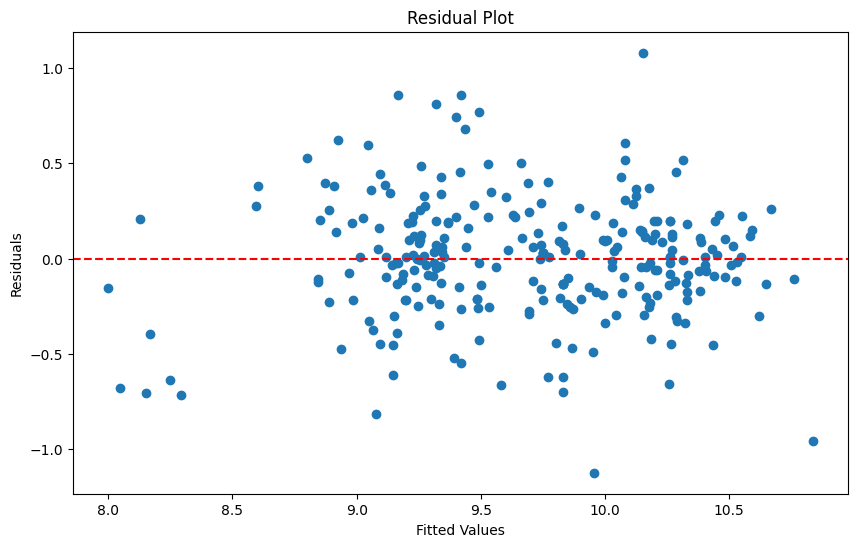

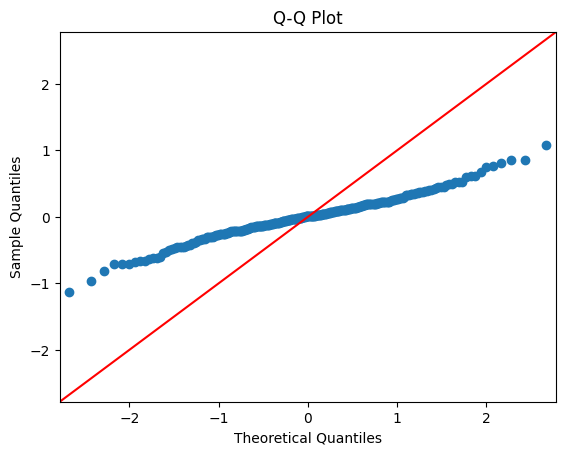

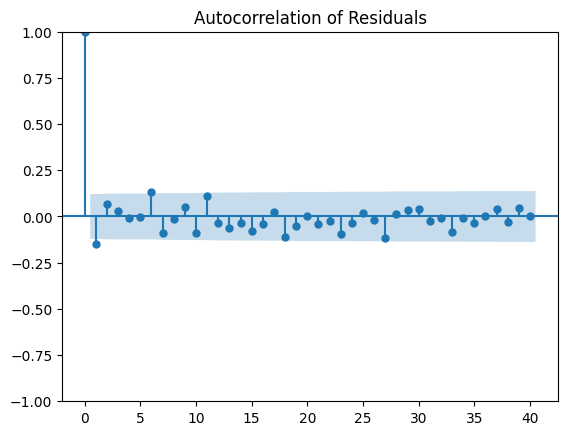

In [281]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Residual plot
residuals = res.resids
plt.figure(figsize=(10, 6))
plt.scatter(res.fitted_values, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Q-Q Plot
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot')
plt.show()

# Autocorrelation of Residuals
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.title('Autocorrelation of Residuals')
plt.show()


##### Fitted value is predicted value of dependent varibale 'web traffic'. It shows that, around 10,000 and 15,000 has highest predicted power that has smallest errors. 

In [196]:
ind_vars = [ 'apr', 'cross_visitation','rank'
       ]  #,'Log_incentive','mentions' ,  'search_interest'

# Define the dependent variable and independent variables
y = filtered_df['Log_Web_Traffic']
#X = filtered_df[['google trend','Web Traffic_Lag1' ] + monthly_dummies.columns.tolist()]
time_series_vars =  ['Log_Web_Traffic_Lag1','Log_Web_Traffic_Lag2','Log_Web_Traffic_Lag3']#,'Log_Web_Traffic_Lag4']
seasonal_vars = ['Month_9']
X = filtered_df[time_series_vars + ind_vars + seasonal_vars]

# Add a constant term to the model
X = sm.add_constant(X)

# Fit the fixed effects model with entity effects (account product effects)
mod = PanelOLS(y, X, entity_effects=True, drop_absorbed=True)
res = mod.fit()

# Display the results
print(res)

                          PanelOLS Estimation Summary                           
Dep. Variable:        Log_Web_Traffic   R-squared:                        0.3215
Estimator:                   PanelOLS   R-squared (Between):              0.8761
No. Observations:                 220   R-squared (Within):               0.3215
Date:                Sat, Jun 22 2024   R-squared (Overall):              0.7701
Time:                        20:53:37   Log-likelihood                   -52.131
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      13.676
Entities:                          11   P-value                           0.0000
Avg Obs:                       20.000   Distribution:                   F(7,202)
Min Obs:                       20.000                                           
Max Obs:                       20.000   F-statistic (robust):             13.676
                            

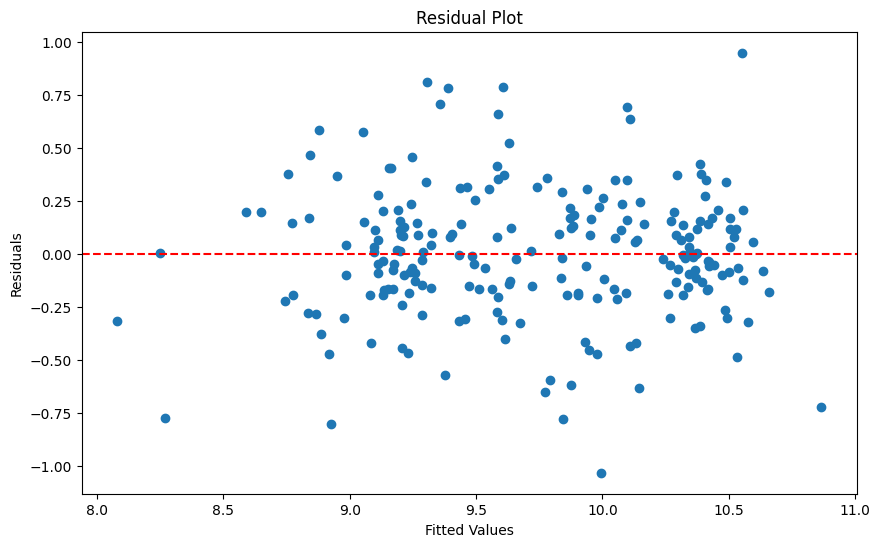

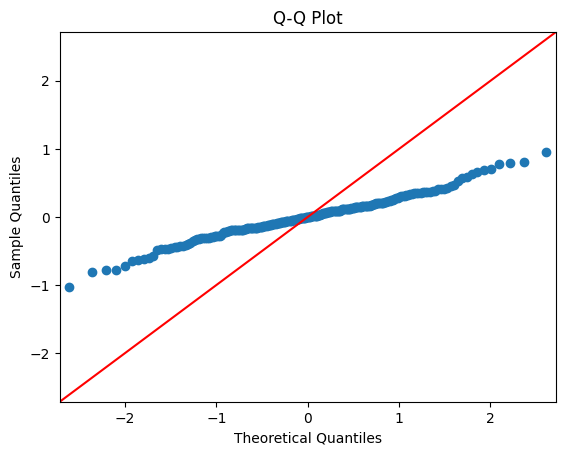

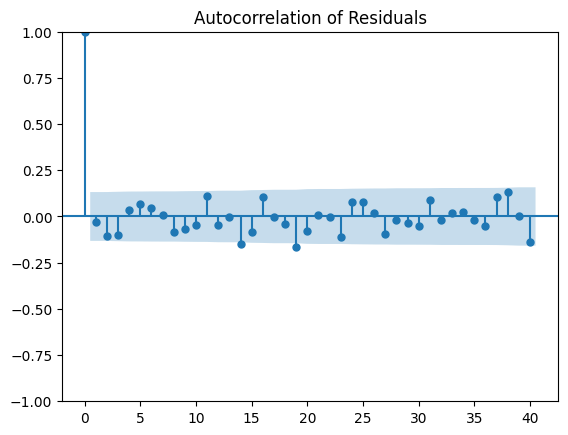

In [197]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Residual plot
residuals = res.resids
plt.figure(figsize=(10, 6))
plt.scatter(res.fitted_values, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Q-Q Plot
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot')
plt.show()

# Autocorrelation of Residuals
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.title('Autocorrelation of Residuals')
plt.show()


### ARIMA

In [181]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Perform Breusch-Pagan test for heteroscedasticity
bp_test = het_breuschpagan(res.resids, res.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))

# If heteroscedasticity is present, use robust standard errors
pooled_ols_model_robust = sm.OLS(y, X).fit(cov_type='HC3')
print(pooled_ols_model_robust.summary())

# Plot ACF and PACF of residuals to inspect for autocorrelation
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(res.resids, lags=40, ax=ax[0])
plot_pacf(res.resids, lags=40, ax=ax[1])
plt.show()

# Consider ARIMA or GLS models for better handling autocorrelation
# Example: Fit an ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# Define ARIMA model (p, d, q)
arima_model = ARIMA(y, order=(1, 0, 1), exog=X)
arima_res = arima_model.fit()
print(arima_res.summary())


TypeError: float() argument must be a string or a real number, not 'PanelData'

In [ ]:
selected_columns = ['cross_visitation', 'Log_Web_Traffic', 'rank', 'apr', 'mentions','Log_incentive', 'search_interest', 'Log_Web_Traffic_Lag1']
filtered_df_selected = filtered_df[selected_columns]
filtered_df_selected

cross_visitation  Log_Web_Traffic      rank  apr  \
bank      date                                                           
abanca    2021-12-01          0.077994         9.629313  4.000000  0.0   
          2022-01-01          0.062500        10.649818  4.000000  0.0   
          2022-01-01          0.062500        10.649818  4.000000  0.0   
          2022-01-01          0.062500        10.649818  4.000000  0.0   
          2022-02-01          0.052288        10.448690  4.000000  0.0   
...                                ...              ...       ...  ...   
santander 2023-10-01          0.126347        10.508833  2.000000  0.0   
          2023-11-01          0.121212        10.474146  1.000000  0.0   
          2023-11-01          0.121212        10.474146  2.000000  0.0   
          2023-12-01          0.159196        10.278586  1.612903  0.0   
          2023-12-01          0.159196        10.278586  2.000000  0.0   

                      mentions  Log_incentive  search_interest  \
bank      date                                                   
abanca    2021-12-01       1.0       5.017280        17.652686   
          2022-01-01       1.0       5.017280        17.652686   
          2022-01-01       1.0       5.017280        17.652686   
          2022-01-01       1.0       5.017280        17.652686   
          2022-02-01       2.0       5.017280        17.643995   
...                        ...            ...              ...   
santander 2023-10-01       1.0       5.993961        68.000000   
          2023-11-01       2.0       5.993961        17.643995   
          2023-11-01       2.0       5.993961        17.643995   
          2023-12-01       1.0       5.993961        17.652686   
          2023-12-01       1.0       5.993961        17.652686   

                      Log_Web_Traffic_Lag1  
bank      date                              
abanca    2021-12-01              9.629313  
          2022-01-01              9.629313  
          2022-01-01             10.649818  
          2022-01-01             10.649818  
          2022-02-01             10.649818  
...                                    ...  
santander 2023-10-01             10.508833  
          2023-11-01             10.508833  
          2023-11-01             10.474146  
          2023-12-01             10.474146  
          2023-12-01             10.278586  

[928 rows x 8 columns]

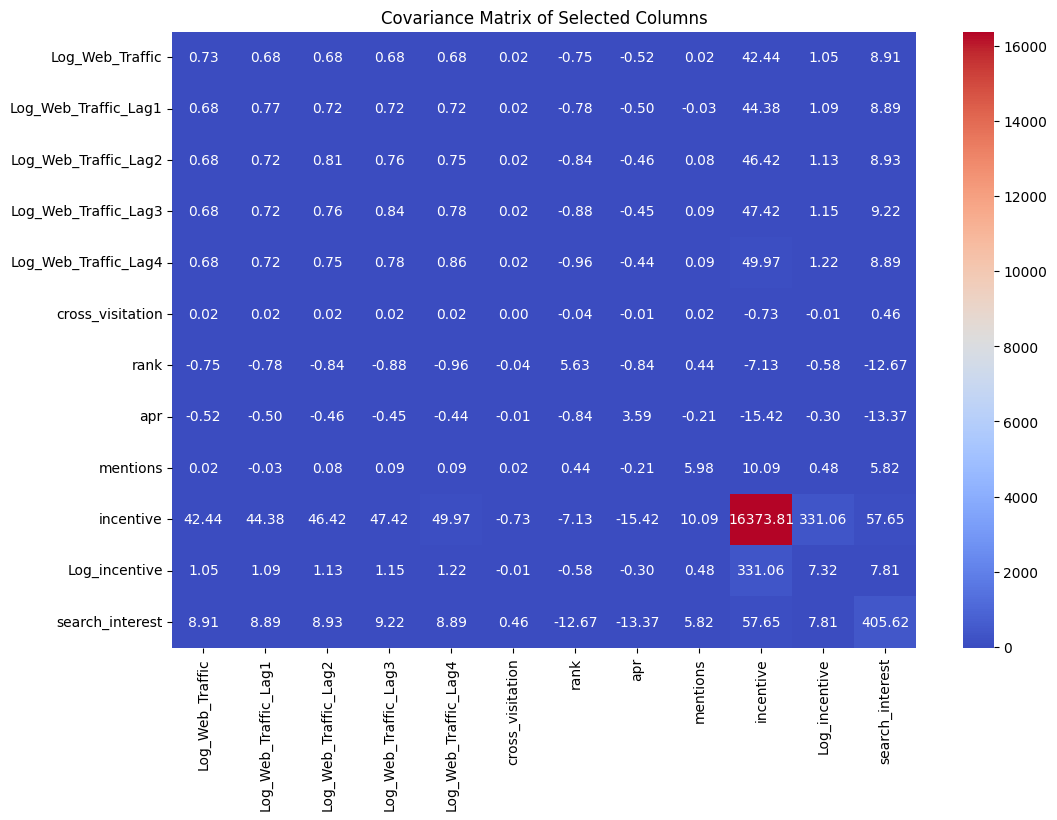

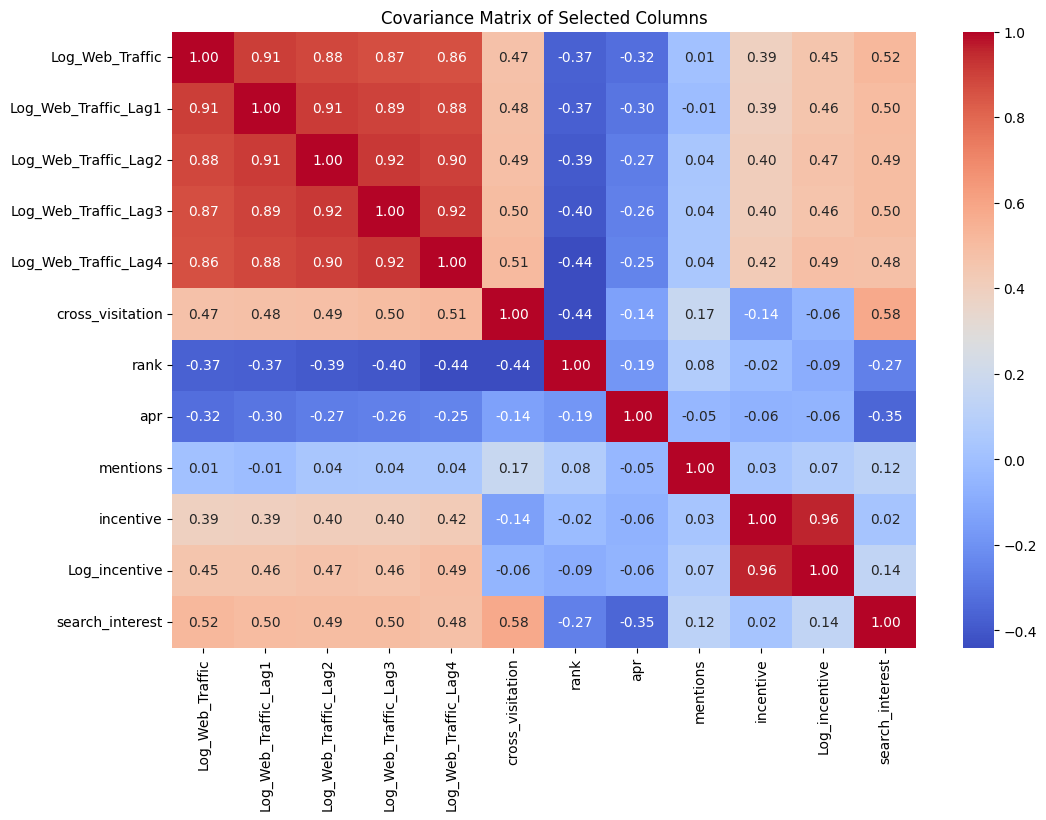

,Variance
Log_Web_Traffic,0.728829
Log_Web_Traffic_Lag1,0.771671
Log_Web_Traffic_Lag2,0.806015
Log_Web_Traffic_Lag3,0.842580
Log_Web_Traffic_Lag4,0.855623
cross_visitation,0.001579
rank,5.628505
apr,3.586966
mentions,5.981963
incentive,16373.806559


In [183]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Select the specific columns
interested_columns = ['cross_visitation', 'rank', 'apr', 'mentions','incentive','Log_incentive', 'search_interest']
time_sereis_column = ['Log_Web_Traffic', 'Log_Web_Traffic_Lag1', 'Log_Web_Traffic_Lag2', 'Log_Web_Traffic_Lag3','Log_Web_Traffic_Lag4']


selected_columns = time_sereis_column + interested_columns
filtered_df_selected = filtered_df[selected_columns]

# Calculate the covariance matrix for the selected columns
cov_matrix = filtered_df_selected.cov()

corr_matrix = filtered_df_selected.corr()# standarized covariance matrix

# Calculate the mean, variance, skewness, and kurtosis for each selected column
means = filtered_df_selected.mean()
variances = filtered_df_selected.var()
skewness = filtered_df_selected.skew()
kurtosis = filtered_df_selected.kurtosis()

# Combine the four moments into a DataFrame
moments_df = pd.DataFrame({
    #'Mean': means,
    'Variance': variances,
    #'Skewness': skewness,
    #'Kurtosis': kurtosis
})

# Plot the covariance matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Covariance Matrix of Selected Columns")
plt.show()


# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Covariance Matrix of Selected Columns")
plt.show()

moments_df


In [218]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Assuming filtered_df is already loaded and properly indexed by 'date' and 'bank'


# Ensure all independent variables are numeric

#numeric_columns = ['cross_visitation', 'rank', 'incentive', 'apr', 'mentions', 'search_interest', 'Log_Web_Traffic_Lag1']
numeric_columns = ['Log_Web_Traffic_Lag1','Log_Web_Traffic_Lag2']
filtered_df[numeric_columns] = filtered_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Ensure the Month_9 column is numeric (if it contains True/False)
filtered_df['Month_9'] = filtered_df['Month_9'].astype(int)


# Define the independent variables including the lagged web traffic
ind_vars = numeric_columns # + ['Month_9']
X = filtered_df[ind_vars]

# Add a constant term to the model
X = sm.add_constant(X)

# Define the dependent variable
y = filtered_df['Log_Web_Traffic']

# Fit the pooled OLS model
pooled_ols_model = sm.OLS(y, X).fit()

# Display the results
print(pooled_ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:        Log_Web_Traffic   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     228.9
Date:                Sat, 22 Jun 2024   Prob (F-statistic):           2.43e-41
Time:                        20:57:08   Log-Likelihood:                -39.258
No. Observations:                 121   AIC:                             84.52
Df Residuals:                     118   BIC:                             92.90
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.2750 

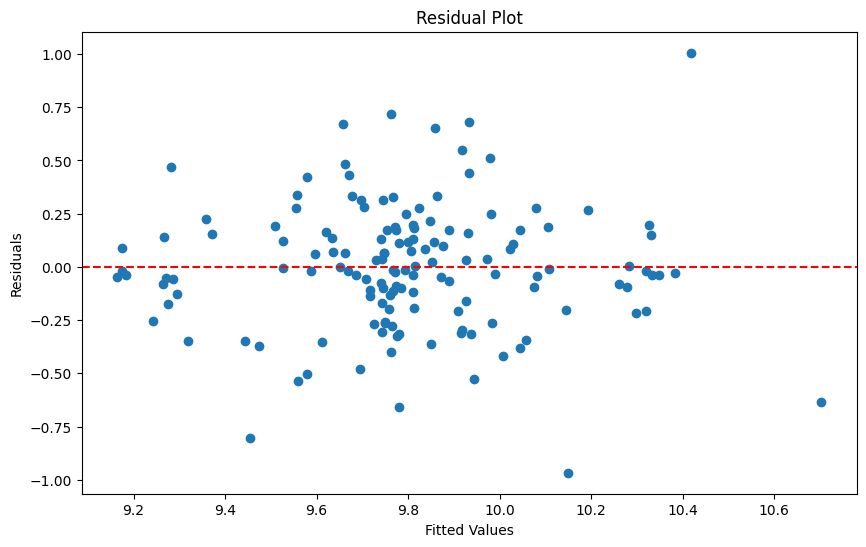

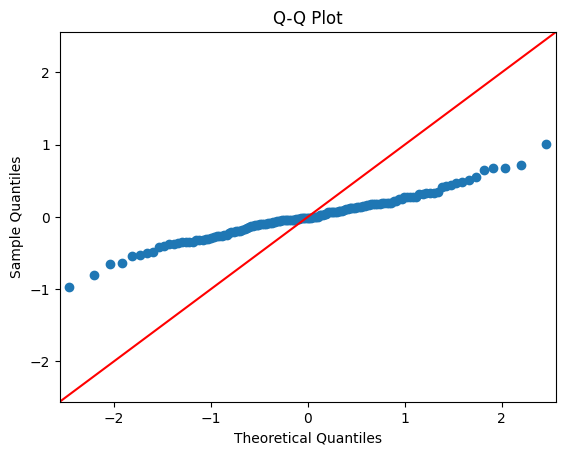

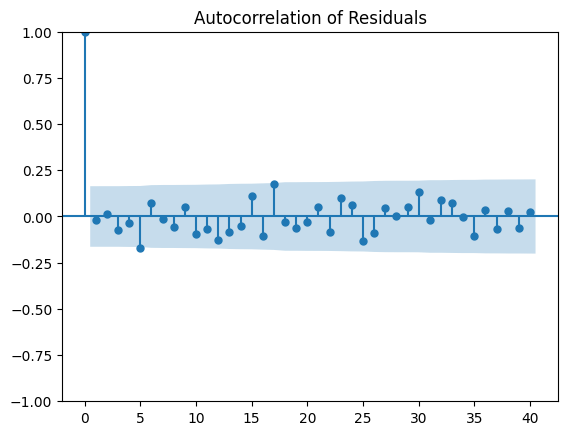

In [219]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Residual plot
residuals = res.resids
plt.figure(figsize=(10, 6))
plt.scatter(res.fitted_values, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Q-Q Plot
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot')
plt.show()

# Autocorrelation of Residuals
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.title('Autocorrelation of Residuals')
plt.show()


#### Explain
R2 is 0.914 explained the model variance. Adjusted R2 is also 0.914 explained model is not overfitted also.

F-stat = 9365 with 0 F-stat prob: explained that model is statistically significant overall.

The Durbin-Watson statistic is 2.002, which suggests that there is no autocorrelation in the residuals.
The Omnibus and Jarque-Bera (JB) tests indicate that there might be some deviations from normality in the residuals, as the p-values for both tests are 0.000.


In [201]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Assuming filtered_df is already loaded and properly indexed by 'date' and 'bank'


# Ensure all independent variables are numeric

#numeric_columns = ['cross_visitation', 'rank', 'incentive', 'apr', 'mentions', 'search_interest', 'Log_Web_Traffic_Lag1']
numeric_columns = ['Log_Web_Traffic_Lag1']#,'cross_visitation']
filtered_df[numeric_columns] = filtered_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Ensure the Month_9 column is numeric (if it contains True/False)
filtered_df['Month_9'] = filtered_df['Month_9'].astype(int)

# Define the independent variables including the lagged web traffic
ind_vars = numeric_columns # + ['Month_9']
X = filtered_df[ind_vars]

# Add a constant term to the model
X = sm.add_constant(X)

# Define the dependent variable
y = filtered_df['Log_Web_Traffic']

# Fit the pooled OLS model
pooled_ols_model = sm.OLS(y, X).fit()

# Display the results
print(pooled_ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Log_Web_Traffic   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     786.9
Date:                Sat, 22 Jun 2024   Prob (F-statistic):           1.48e-68
Time:                        20:55:50   Log-Likelihood:                -70.181
No. Observations:                 187   AIC:                             144.4
Df Residuals:                     185   BIC:                             150.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.2693 

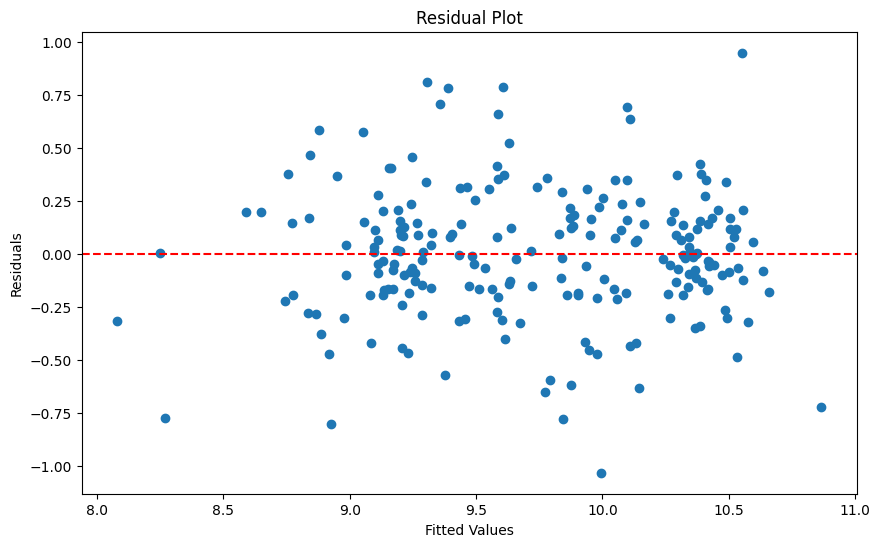

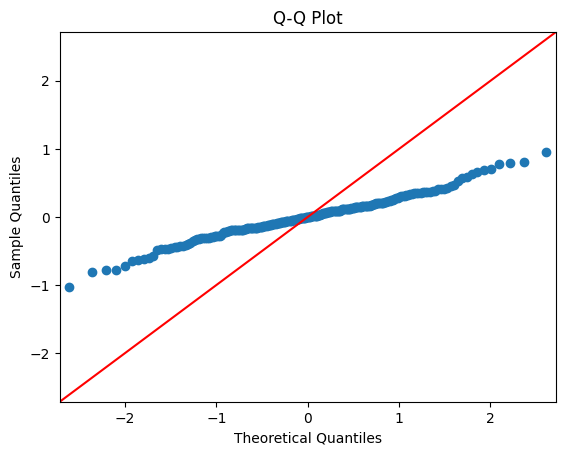

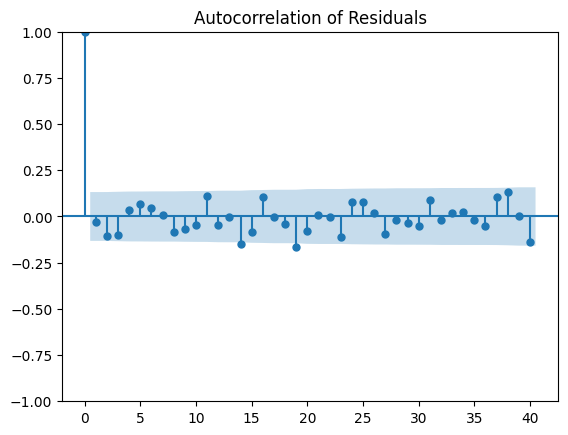

In [202]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Residual plot
residuals = res.resids
plt.figure(figsize=(10, 6))
plt.scatter(res.fitted_values, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Q-Q Plot
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot')
plt.show()

# Autocorrelation of Residuals
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.title('Autocorrelation of Residuals')
plt.show()


In [220]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Assuming filtered_df is already loaded and properly indexed by 'date' and 'bank'


# Ensure all independent variables are numeric

#numeric_columns = [, 'rank', 'incentive', 'apr', 'mentions', 'search_interest', 'Log_Web_Traffic_Lag1']
numeric_columns = ['cross_visitation']
filtered_df[numeric_columns] = filtered_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Ensure the Month_9 column is numeric (if it contains True/False)
filtered_df['Month_9'] = filtered_df['Month_9'].astype(int)


# Define the independent variables including the lagged web traffic
ind_vars = numeric_columns # + ['Month_9']
X = filtered_df[ind_vars]

# Add a constant term to the model
X = sm.add_constant(X)

# Define the dependent variable
y = filtered_df['Log_Web_Traffic']

# Fit the pooled OLS model
pooled_ols_model = sm.OLS(y, X).fit()

# Display the results
print(pooled_ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Log_Web_Traffic   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     19.09
Date:                Sat, 22 Jun 2024   Prob (F-statistic):           2.87e-05
Time:                        20:57:59   Log-Likelihood:                -112.73
No. Observations:                 110   AIC:                             229.5
Df Residuals:                     108   BIC:                             234.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                9.7899      0.065  

In [221]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Assuming filtered_df is already loaded and properly indexed by 'date' and 'bank'

# Ensure all independent variables are numeric

#numeric_columns = ['cross_visitation', 'rank', 'incentive', 'apr', 'mentions', , 'Log_Web_Traffic_Lag1']
numeric_columns = ['search_interest']
filtered_df[numeric_columns] = filtered_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Ensure the Month_9 column is numeric (if it contains True/False)
filtered_df['Month_9'] = filtered_df['Month_9'].astype(int)


# Define the independent variables including the lagged web traffic
ind_vars = numeric_columns # + ['Month_9']
X = filtered_df[ind_vars]

# Add a constant term to the model
X = sm.add_constant(X)

# Define the dependent variable
y = filtered_df['Log_Web_Traffic']

# Fit the pooled OLS model
pooled_ols_model = sm.OLS(y, X).fit()

# Display the results
print(pooled_ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Log_Web_Traffic   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     33.70
Date:                Sat, 22 Jun 2024   Prob (F-statistic):           8.11e-08
Time:                        20:58:14   Log-Likelihood:                -92.901
No. Observations:                  99   AIC:                             189.8
Df Residuals:                      97   BIC:                             195.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               9.7871      0.063    1

In [223]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Assuming filtered_df is already loaded and properly indexed by 'date' and 'bank'


# Ensure all independent variables are numeric

#numeric_columns = ['cross_visitation', 'rank', 'incentive', 'apr', 'mentions', , 'Log_Web_Traffic_Lag1']
numeric_columns = ['search_interest','Log_Web_Traffic_Lag1','Log_Web_Traffic_Lag2']
filtered_df[numeric_columns] = filtered_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Ensure the Month_9 column is numeric (if it contains True/False)
filtered_df['Month_9'] = filtered_df['Month_9'].astype(int)


# Define the independent variables including the lagged web traffic
ind_vars = numeric_columns # + ['Month_9']
X = filtered_df[ind_vars]

# Add a constant term to the model
X = sm.add_constant(X)

# Define the dependent variable
y = filtered_df['Log_Web_Traffic']

# Fit the pooled OLS model
pooled_ols_model = sm.OLS(y, X).fit()

# Display the results
print(pooled_ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Log_Web_Traffic   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     91.53
Date:                Sat, 22 Jun 2024   Prob (F-statistic):           1.12e-24
Time:                        20:58:45   Log-Likelihood:                -21.841
No. Observations:                  77   AIC:                             51.68
Df Residuals:                      73   BIC:                             61.06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.3110 

                feature         VIF
0                 const  338.306455
1      cross_visitation    2.766331
2                  rank    1.683584
3             incentive    1.481764
4                   apr    1.230691
5              mentions    1.144556
6       search_interest    2.231918
7  Log_Web_Traffic_Lag1    1.832374


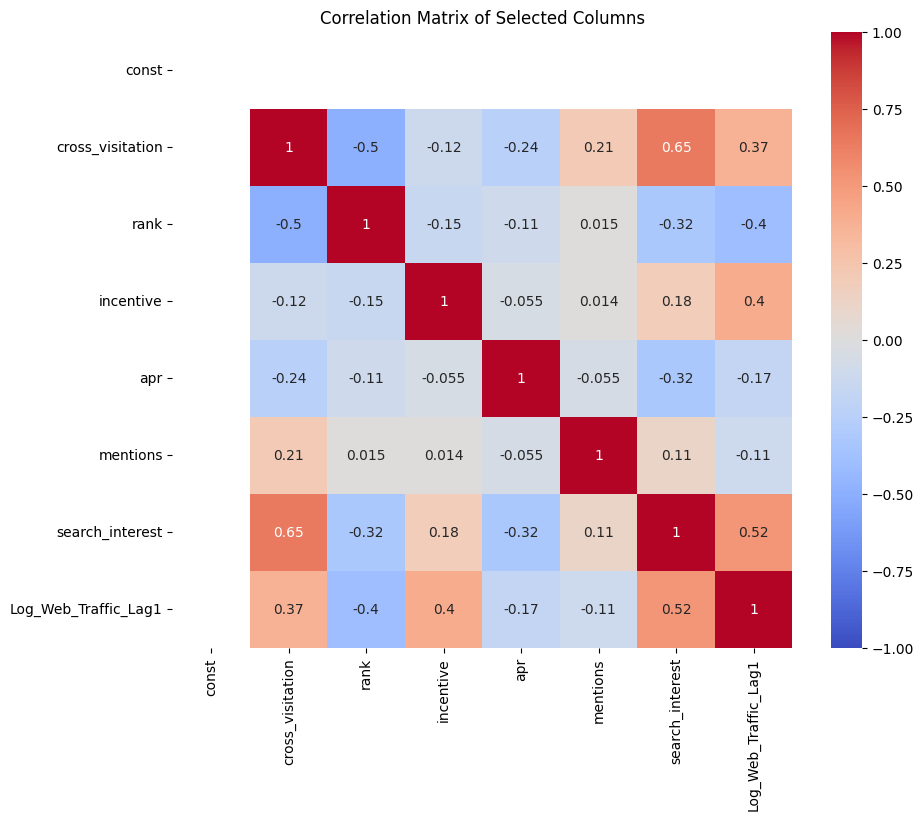

                            OLS Regression Results                            
Dep. Variable:        Log_Web_Traffic   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     39.83
Date:                Sat, 22 Jun 2024   Prob (F-statistic):           1.09e-20
Time:                        20:59:02   Log-Likelihood:                -24.757
No. Observations:                  77   AIC:                             63.51
Df Residuals:                      70   BIC:                             79.92
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.2233 

In [224]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming filtered_df is already defined and preprocessed

# Add a constant term to the model
X = sm.add_constant(filtered_df[['cross_visitation', 'rank', 'incentive', 'apr', 'mentions', 'search_interest', 'Log_Web_Traffic_Lag1']])

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

# Correlation matrix
corr_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Selected Columns")
plt.show()

# If multicollinearity is detected, consider dropping one of the correlated predictors or using regularization
# Fit the pooled OLS model without the correlated predictor
X_reduced = X.drop(['search_interest'], axis=1)  # Example of dropping a predictor
pooled_ols_model_reduced = sm.OLS(filtered_df['Log_Web_Traffic'], X_reduced).fit()

print(pooled_ols_model_reduced.summary())


In [207]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Assuming filtered_df is already loaded and properly indexed by 'date' and 'bank'


# Ensure all independent variables are numeric
############# multicollinearity => 'search_interest',
numeric_columns = ['cross_visitation', 'rank', 'incentive', 'apr', 'mentions',  'Log_Web_Traffic_Lag1']
filtered_df[numeric_columns] = filtered_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Ensure the Month_9 column is numeric (if it contains True/False)
filtered_df['Month_9'] = filtered_df['Month_9'].astype(int)


# Define the independent variables including the lagged web traffic
ind_vars = numeric_columns + ['Month_9']
X = filtered_df[ind_vars]

# Add a constant term to the model
X = sm.add_constant(X)

# Define the dependent variable
y = filtered_df['Log_Web_Traffic']

# Fit the pooled OLS model
pooled_ols_model = sm.OLS(y, X).fit()

# Display the results
print(pooled_ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:        Log_Web_Traffic   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     73.72
Date:                Sat, 22 Jun 2024   Prob (F-statistic):           5.13e-43
Time:                        20:55:52   Log-Likelihood:                -54.259
No. Observations:                 143   AIC:                             124.5
Df Residuals:                     135   BIC:                             148.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.2725 

                feature         VIF
0                 const  338.306455
1       search_interest    2.231918
2      cross_visitation    2.766331
3                  rank    1.683584
4             incentive    1.481764
5                   apr    1.230691
6              mentions    1.144556
7  Log_Web_Traffic_Lag1    1.832374


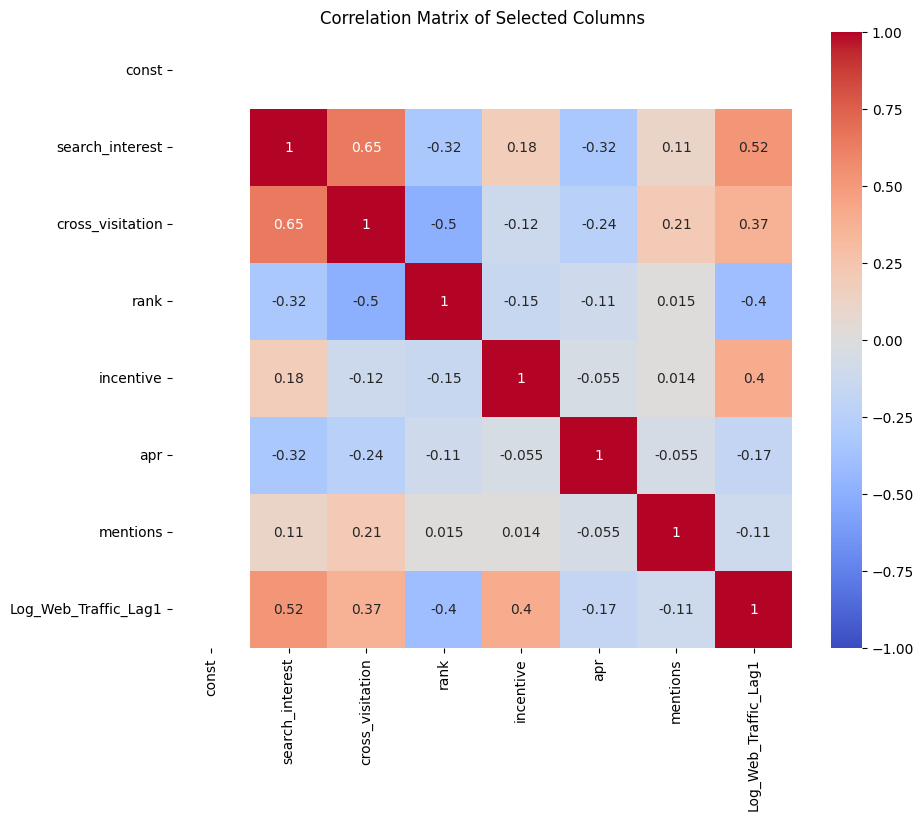

                            OLS Regression Results                            
Dep. Variable:        Log_Web_Traffic   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     39.83
Date:                Sat, 22 Jun 2024   Prob (F-statistic):           1.09e-20
Time:                        20:59:24   Log-Likelihood:                -24.757
No. Observations:                  77   AIC:                             63.51
Df Residuals:                      70   BIC:                             79.92
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.2233 

In [225]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming filtered_df is already defined and preprocessed

# Add a constant term to the model

### multicollinearity 
X = sm.add_constant(filtered_df[['search_interest','cross_visitation', 'rank', 'incentive', 'apr', 'mentions',  'Log_Web_Traffic_Lag1']])

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

# Correlation matrix
corr_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Selected Columns")
plt.show()

# If multicollinearity is detected, consider dropping one of the correlated predictors or using regularization
# Fit the pooled OLS model without the correlated predictor
X_reduced = X.drop(['search_interest'], axis=1)  # Example of dropping a predictor
pooled_ols_model_reduced = sm.OLS(filtered_df['Log_Web_Traffic'], X_reduced).fit()

print(pooled_ols_model_reduced.summary())


                feature         VIF
0                 const  338.306455
1       search_interest    2.231918
2      cross_visitation    2.766331
3                  rank    1.683584
4             incentive    1.481764
5                   apr    1.230691
6              mentions    1.144556
7  Log_Web_Traffic_Lag1    1.832374


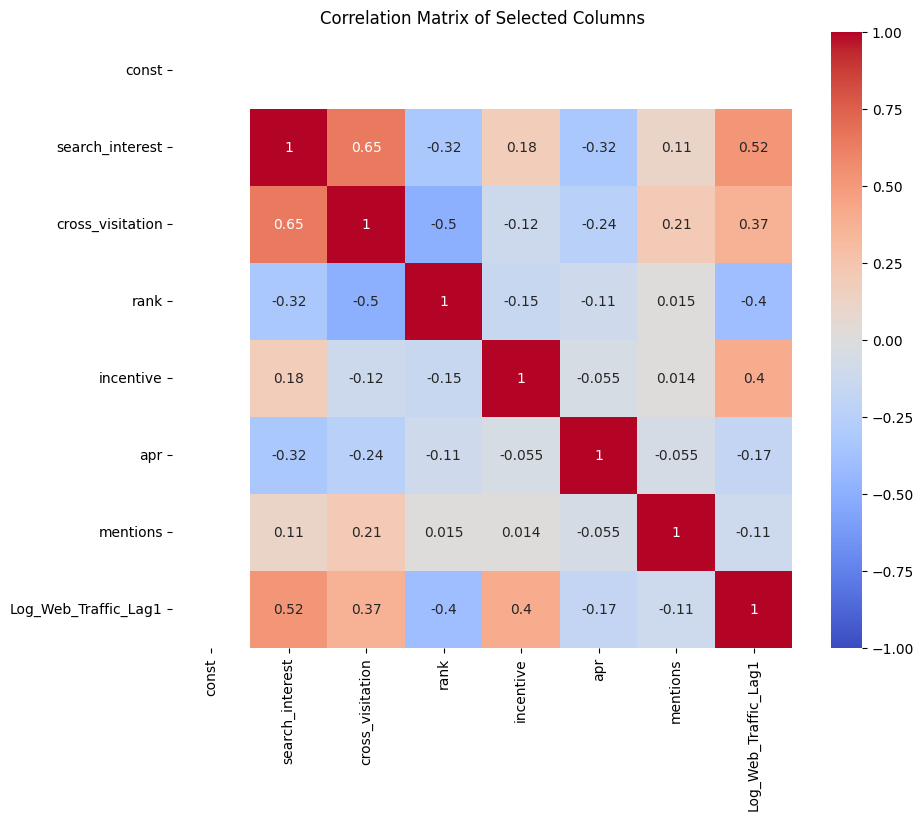

                            OLS Regression Results                            
Dep. Variable:        Log_Web_Traffic   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     46.86
Date:                Sat, 22 Jun 2024   Prob (F-statistic):           3.71e-21
Time:                        20:59:47   Log-Likelihood:                -25.768
No. Observations:                  77   AIC:                             63.54
Df Residuals:                      71   BIC:                             77.60
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.7891 

In [226]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

### multicollinearity 
X = sm.add_constant(filtered_df[['search_interest','cross_visitation', 'rank', 'incentive', 'apr', 'mentions',  'Log_Web_Traffic_Lag1']])

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

# Correlation matrix
corr_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Selected Columns")
plt.show()

# If multicollinearity is detected, consider dropping one of the correlated predictors or using regularization
# Fit the pooled OLS model without the correlated predictor
X_reduced = X.drop(['search_interest', 'incentive'], axis=1)  # Example of dropping a predictor
pooled_ols_model_reduced = sm.OLS(filtered_df['Log_Web_Traffic'], X_reduced).fit()

print(pooled_ols_model_reduced.summary())


## Standarized variables

In [227]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Select the columns to be scaled
columns_to_scale = ['cross_visitation', 'rank', 'apr', 'incentive', 'mentions', 'search_interest', 'Log_Web_Traffic_Lag1']

# Initialize the scaler
scaler = StandardScaler()

# Scale the selected columns
filtered_df[columns_to_scale] = scaler.fit_transform(filtered_df[columns_to_scale])

# Define the independent variables including the lagged web traffic
ind_vars = columns_to_scale

# Add a constant term to the model
X = sm.add_constant(filtered_df[ind_vars])

# Define the dependent variable
y = filtered_df['Log_Web_Traffic']

# Fit the pooled OLS model
pooled_ols_model = sm.OLS(y, X).fit()

# Display the results
print(pooled_ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:        Log_Web_Traffic   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     33.67
Date:                Sat, 22 Jun 2024   Prob (F-statistic):           7.12e-20
Time:                        21:00:06   Log-Likelihood:                -24.738
No. Observations:                  77   AIC:                             65.48
Df Residuals:                      69   BIC:                             84.23
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    9.7968 

                feature       VIF
0                 const  1.000000
1       search_interest  2.231918
2      cross_visitation  2.766331
3                  rank  1.683584
4             incentive  1.481764
5                   apr  1.230691
6              mentions  1.144556
7  Log_Web_Traffic_Lag1  1.832374


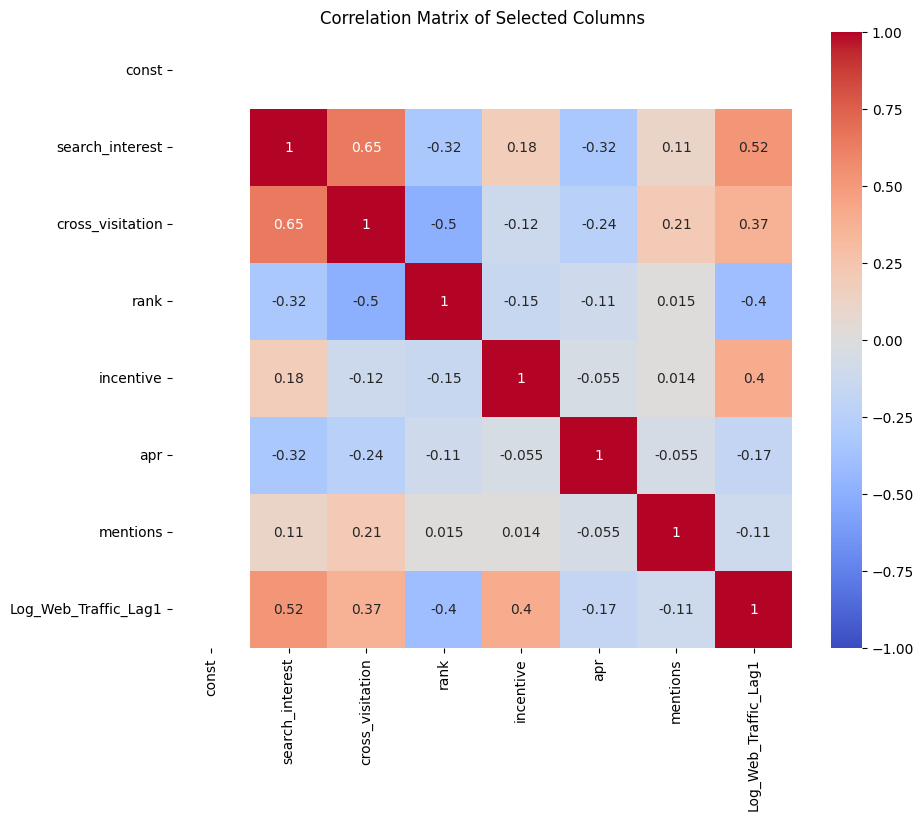

                            OLS Regression Results                            
Dep. Variable:        Log_Web_Traffic   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     39.83
Date:                Sat, 22 Jun 2024   Prob (F-statistic):           1.09e-20
Time:                        21:01:03   Log-Likelihood:                -24.757
No. Observations:                  77   AIC:                             63.51
Df Residuals:                      70   BIC:                             79.92
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    9.7968 

In [230]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

### multicollinearity 
X = sm.add_constant(filtered_df[['search_interest','cross_visitation', 'rank', 'incentive', 'apr', 'mentions',  'Log_Web_Traffic_Lag1']])

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

# Correlation matrix
corr_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Selected Columns")
plt.show()

# If multicollinearity is detected, consider dropping one of the correlated predictors or using regularization
# Fit the pooled OLS model without the correlated predictor
X_reduced = X.drop(['search_interest'], axis=1)  # Example of dropping a predictor
pooled_ols_model_reduced = sm.OLS(filtered_df['Log_Web_Traffic'], X_reduced).fit()

print(pooled_ols_model_reduced.summary())


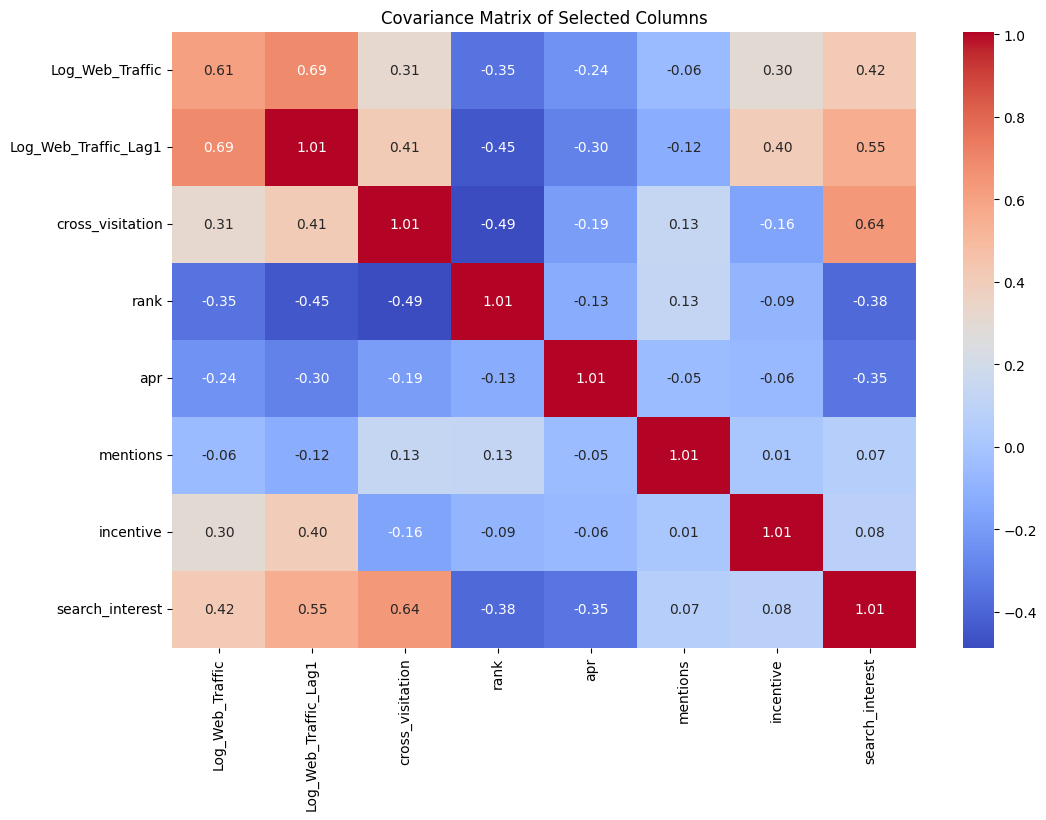

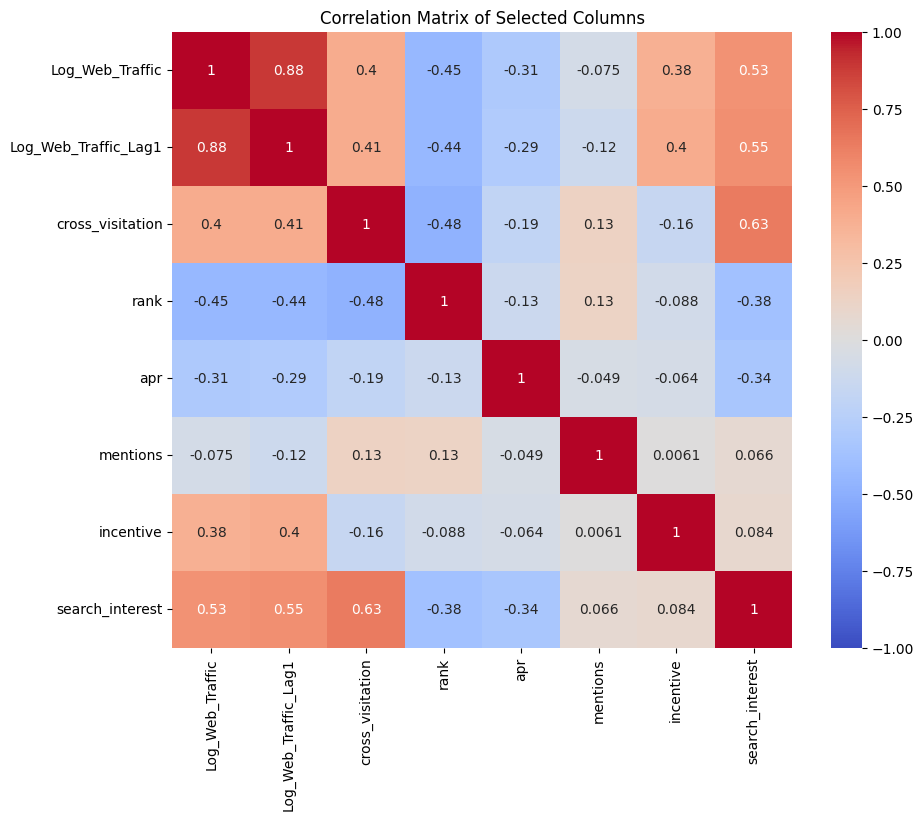

,Variance
Log_Web_Traffic,0.607318
Log_Web_Traffic_Lag1,1.007042
cross_visitation,1.007042
rank,1.007042
apr,1.007042
mentions,1.007042
incentive,1.007042
search_interest,1.007042


In [212]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Select the specific columns
interested_columns = ['cross_visitation', 'rank', 'apr', 'mentions','incentive', 'search_interest'] #'Log_incentive',
time_sereis_column = ['Log_Web_Traffic', 'Log_Web_Traffic_Lag1']#, 'Log_Web_Traffic_Lag2', 'Log_Web_Traffic_Lag3','Log_Web_Traffic_Lag4']


selected_columns = time_sereis_column + interested_columns
filtered_df_selected = filtered_df[selected_columns]

# Calculate the mean, variance, skewness, and kurtosis for each selected column
means = filtered_df_selected.mean()
variances = filtered_df_selected.var()
skewness = filtered_df_selected.skew()
kurtosis = filtered_df_selected.kurtosis()

# Combine the four moments into a DataFrame
moments_df = pd.DataFrame({
    #'Mean': means,
    'Variance': variances,
    #'Skewness': skewness,
    #'Kurtosis': kurtosis
})


# Calculate the covariance matrix for the selected columns
cov_matrix = filtered_df_selected.cov()

# Plot the covariance matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Covariance Matrix of Selected Columns")
plt.show()


corr_matrix = filtered_df_selected.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Selected Columns")
plt.show()
moments_df


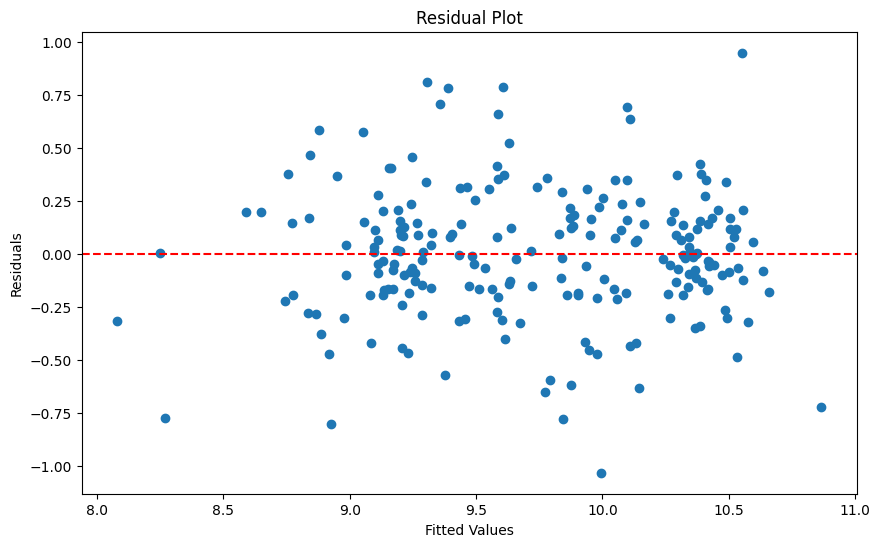

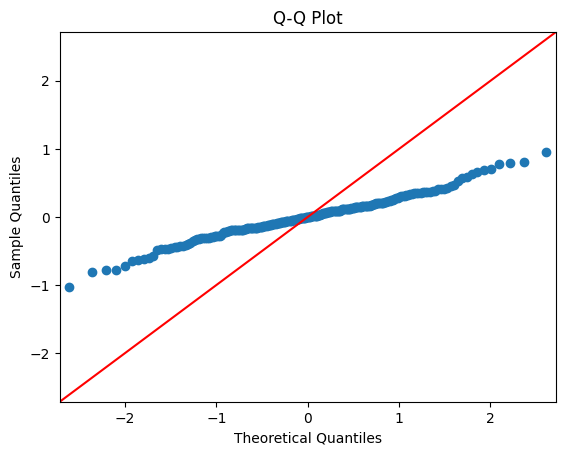

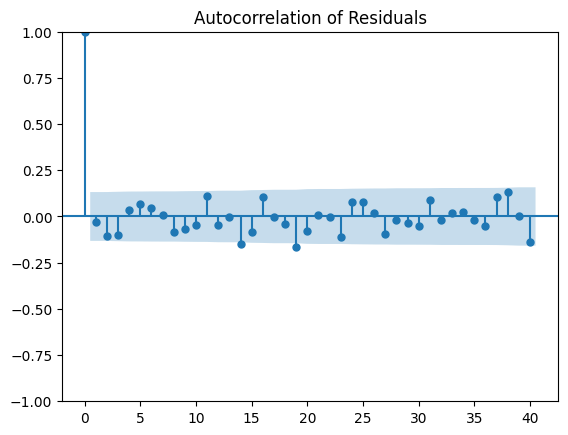

In [213]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Residual plot
residuals = res.resids
plt.figure(figsize=(10, 6))
plt.scatter(res.fitted_values, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Q-Q Plot
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot')
plt.show()

# Autocorrelation of Residuals
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.title('Autocorrelation of Residuals')
plt.show()


#### Starndarized Fixed Effect

In [214]:
ind_vars = [ 'apr', 'cross_visitation','rank'
       ,'Log_incentive','mentions' ,  'search_interest']

# Define the dependent variable and independent variables
y = filtered_df['Log_Web_Traffic']
#X = filtered_df[['google trend','Web Traffic_Lag1' ] + monthly_dummies.columns.tolist()]
time_series_vars =  ['Log_Web_Traffic_Lag1']#,'Log_Web_Traffic_Lag2','Log_Web_Traffic_Lag3','Log_Web_Traffic_Lag4']
seasonal_vars = ['Month_9']
X = filtered_df[time_series_vars + ind_vars + seasonal_vars]

# Add a constant term to the model
X = sm.add_constant(X)

# Fit the fixed effects model with entity effects (account product effects)
mod = PanelOLS(y, X, entity_effects=True, drop_absorbed=True)
res = mod.fit()

# Display the results
print(res)

                          PanelOLS Estimation Summary                           
Dep. Variable:        Log_Web_Traffic   R-squared:                        0.1200
Estimator:                   PanelOLS   R-squared (Between):              0.1250
No. Observations:                 143   R-squared (Within):               0.1200
Date:                Sat, Jun 22 2024   R-squared (Overall):              0.1242
Time:                        20:55:54   Log-likelihood                   -28.957
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      2.1140
Entities:                          11   P-value                           0.0392
Avg Obs:                       13.000   Distribution:                   F(8,124)
Min Obs:                       13.000                                           
Max Obs:                       13.000   F-statistic (robust):             2.1140
                            

#### Random Effect vs Fixed Effect

In [215]:
import pandas as pd
import statsmodels.api as sm
from linearmodels.panel import PanelOLS, RandomEffects
from linearmodels.panel import compare

# Ensure your DataFrame is correctly formatted
filtered_df = filtered_df.apply(pd.to_numeric, errors='coerce')

# Define dependent and independent variables
y = filtered_df['Log_Web_Traffic']
ind_vars = ['cross_visitation', 'rank', 'incentive', 'apr', 'mentions', 'search_interest', 'Log_ Web Traffic_Lag1', 'Month_9']
X = filtered_df[ind_vars]
X = sm.add_constant(X)

# Fit the Fixed Effects Model
fixed_effects_model = PanelOLS(y, X, entity_effects=True)
fe_results = fixed_effects_model.fit()

# Fit the Random Effects Model
random_effects_model = RandomEffects(y, X)
re_results = random_effects_model.fit()

# Perform Hausman Test
comparison = compare({'Fixed Effects': fe_results, 'Random Effects': re_results})
print(comparison)

KeyError: "['Log_ Web Traffic_Lag1'] not in index"

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from linearmodels.panel import PanelOLS


# Define the independent variables including the lagged web traffic
ind_vars = ['cross_visitation', 'rank', 'incentive', 'apr', 'mentions', 'search_interest', 'Log_Web_Traffic_Lag1', 'Month_9']
X = filtered_df[ind_vars]

# Add a constant term to the model
X = sm.add_constant(X)

# Define the dependent variable
y = filtered_df['Log_Web_Traffic']

# Fit the pooled OLS model
pooled_ols_model = sm.OLS(y, X).fit()

# Display the results
print(pooled_ols_model.summary())


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).